# Assignment Lending Club Case Study
## By: Edwin Mathew
## Date : 10/08/2022

## Business Understanding/Objectives

We got a request from an online loan marketplace which specialize in Facilitating Personal Loans, business loans and financing of medical procedure. The company like to do a Exploratory Credit Risk Analytics on the lending data available to them, main objective of this task is to understand the 'risky' applicants that can cause Credit loss due to default. If the analysis can be used to identify the risky loan applicants, then such loans can be reduced therby cutting down the amount of credit loss due to defaults.

Aim of this EDA is to find the driving factors behind the loan default, variables which are strong indicators will be presented. 


In [547]:
#import the required libraries
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime


# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None

#### Read csv file and store it in dataframe then use this to find the shape, data structure and observe the data structure

In [548]:
loandata = pd.read_csv(r'loan.csv',encoding='utf-8')
print(loandata.shape)
loandata.head(5)

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

data.csv contains 39717 rows and 111 coloumns.
### Next step is Cleaning the Data
1. Check the data type to find out the generic view of the data 

In [549]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


2. Find out how many coloumns have null values and what percentage to see the data integrity

In [550]:
loandata[loandata.columns[loandata.isnull().any()]].isnull().sum() * 100 / loandata.shape[0]

emp_title                           6.191303
emp_length                          2.706650
desc                               32.580507
title                               0.027696
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
revol_util                          0.125891
last_pymnt_d                        0.178765
next_pymnt_d                       97.129693
last_credit_pull_d                  0.005036
collections_12_mths_ex_med          0.140998
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_

3. In the output most of the columns have more than 60% of data missing these can be dropped without causing any issues to the structure, desc column only had 32% data missing but the information has been grabbed by purpose and title columns so this can be removed as well. 
4. lets look at the rest of the columns to understand a bit further (additional 10 coloumns) and do missing data imputation 


In [551]:
loandata = loandata[loandata.columns[((loandata.isnull().sum())/len(loandata)) < 0.3]]
loandata[loandata.columns[loandata.isnull().any()]].isnull().sum() * 100 / loandata.shape[0]


emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

5. Now implute mode values in for the categorial data in here such as emp_title and title
  . Both last payment date and last credit pull date needs to split into two coloumns and fill the NaNs
  . collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens only contain 0 and Nan (this does not show 
    any crucial information. title is a full description of purpose which is cateogrised so we can drop this as         well)
  .Missing values will affect our statistics drastically, for starters our inbuild functions of mean, sum, var etc will give incorrect results which clearly is quite dangerous. 
  

In [552]:
loandata=loandata[~loandata['pub_rec_bankruptcies'].isnull()]
loandata=loandata[~loandata['chargeoff_within_12_mths'].isnull()]
loandata=loandata[~loandata['collections_12_mths_ex_med'].isnull()]
loandata=loandata[~loandata['last_pymnt_d'].isnull()]
loandata=loandata[~loandata['last_credit_pull_d'].isnull()]
loandata=loandata[~loandata['revol_util'].isnull()]
loandata=loandata[~loandata['title'].isnull()]
loandata=loandata[~loandata['emp_title'].isnull()]
loandata=loandata[~loandata['emp_length'].isnull()]


loandata[loandata.columns[loandata.isnull().any()]].isnull().sum() * 100 / loandata.shape[0]


Series([], dtype: float64)

In [553]:
loandata = loandata.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens','title'],axis = 1)
loandata['differenceinstallment']=(loandata['installment']/ loandata['funded_amnt_inv'])*100


#convert the 10+ to 10 years and less than 1 year to 0 year
loandata['emp_length'] = loandata['emp_length'].replace(['10+ years','< 1 year'],['10 years','0 years'])
loandata['emp_length'] = loandata['emp_length'].str.replace(r'years', r'')
loandata['emp_length'] = loandata['emp_length'].str.replace(r'year', r'')


#split the last payment date into two seperate columns 'Month' and 'Year' 
loandata['last_pymnt_Month'], loandata['last_pymnt_Year'] = loandata['last_pymnt_d'].str.split('-', 1).str
loandata['last_pymnt_Month'].fillna(loandata['last_pymnt_Month'].mode()[0], inplace=True)
loandata['last_pymnt_Year'].fillna(loandata['last_pymnt_Year'].mode()[0], inplace=True)


#split the earliest credit into two seperate columns 'Month' and 'Year' 
loandata['earliest_cr_Month'] = loandata['earliest_cr_line'].str.split('-', 1).str[0]
loandata['earliest_cr_Year'] = loandata['earliest_cr_line'].str.split('-', 1).str[1].apply(lambda x: '20'+x if int(x)<=10 else '19'+x) 
loandata['earliest_cr_Year']=pd.to_datetime(loandata['earliest_cr_Year'], format='%Y')
print(loandata['earliest_cr_Year'].head(5))

#split the last credit pull date into two seperate columns 'Month' and 'Year' 
loandata['last_credit_pull_Month'], loandata['last_credit_pull_Year'] = loandata['last_credit_pull_d'].str.split('-', 1).str
loandata['last_credit_pull_Month'].fillna(loandata['last_credit_pull_Month'].mode()[0], inplace=True)
loandata['last_credit_pull_Year'].fillna(loandata['last_credit_pull_Year'].mode()[0], inplace=True)


#since there is no missing data in these column we can use the strptime function take out Year and Month

loandata['issue_Year'] = pd.to_datetime(loandata['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%Y')
loandata['issue_Month'] = pd.to_datetime(loandata['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%b')




# Removing XX from from the end Zipcode since it does not hold any value
loandata['zip_code'] = loandata['zip_code'].str.replace(r'xx', r'').astype('str')


#Removing % from int rate and converting into a float number
loandata['int_rate'] = loandata['int_rate'].str.replace(r'%', r'').astype('float')

#find duplicates of ID and member ID columns to see if there is any trend or difference
print(len(loandata['id'])-len(loandata['id'].drop_duplicates()))
print(len(loandata['member_id'])-len(loandata['member_id'].drop_duplicates()))
# since there are no trend or duplication found these rows can be removed

#loandata = loandata.drop(['id', 'member_id'],axis = 1)

#Although Emp Title is important there is no standardisation across the data
loandata = loandata.drop(['emp_title'],axis = 1)


1   1999-01-01
3   1996-01-01
4   1996-01-01
5   2004-01-01
6   2005-01-01
Name: earliest_cr_Year, dtype: datetime64[ns]
0
0


In [554]:
loandata['earliest_cr_Year'].describe()

count                   36431
unique                     51
top       2000-01-01 00:00:00
freq                     3033
first     1946-01-01 00:00:00
last      2008-01-01 00:00:00
Name: earliest_cr_Year, dtype: object

In [555]:
# the outliers of the annual income needs to be removed since this can throw off the data
# calculate interquartile range
q25, q75 = percentile(loandata['annual_inc'], 25), percentile(loandata['annual_inc'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
#find out the outlier cutoff
cutoff = iqr * 1.5
lowerc, upperc = q25 - cutoff, q75 + cutoff
print (cutoff,lowerc,upperc)

# identify and remove outliers
loandata_up = loandata.loc[(loandata['annual_inc'] >= lowerc) & (loandata['annual_inc'] <= upperc)]


Percentiles: 25th=42000.000, 75th=83000.000, IQR=41000.000
61500.0 -19500.0 144500.0


In [556]:
# Next step is to Bin quantitive data for categorical analysis. First to be binned will be intrest rate.
print(loandata_up['int_rate'].max())
print(loandata_up['int_rate'].min())
#since the minimum data is at 5.42 and maximum is at 24.4 the bins will run from 5-25
loandata_up['int_bin'] = pd.cut(loandata_up['int_rate'], bins = [5.00,10.00,15.00,20.00,25.00], labels = ["5%-10%","11%-15%","16%-20%","21%-25%"])

24.4
5.42


In [557]:
# Next step is to understand the ratio of annual income to loanamount 
loandata_up['Income_ratio']= loandata_up['loan_amnt']/loandata['annual_inc']*100
print(loandata_up['Income_ratio'].describe())
ratio_bin= [0,10,20,30,40,50,60,70,80,90] 
ratio_label = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90"]
loandata_up['ratio_bin']=pd.cut(loandata_up['Income_ratio'],bins =ratio_bin, labels=ratio_label)

count    34738.000000
mean        19.188902
std         11.571328
min          0.737463
25%         10.256410
50%         16.923077
75%         25.773196
max         81.967213
Name: Income_ratio, dtype: float64


In [558]:
# Next is creating bin for the loan amount, from this we can see the loan run from 500 - 35000
print(loandata_up['loan_amnt'].describe())
binsloan= [0,5000,10000,15000,20000,25000,30000,35000] 
labelsloan = ["0-5k","5-10k","10-15k","15-20k","20-25k","25-30k","30-35k"]
loandata_up['loan_amnt_bin']=pd.cut(loandata_up['loan_amnt'],bins =binsloan, labels=labelsloan)

count    34738.000000
mean     10967.445593
std       7164.409495
min        500.000000
25%       5500.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [559]:
# Next is creating bin for the annual income, from this we can see the loan run from 4000 - 145008
loandata_up['annual_inc'].describe()

count     34738.000000
mean      61881.095541
std       27765.198445
min        4000.000000
25%       40320.000000
50%       57300.000000
75%       79000.000000
max      144500.000000
Name: annual_inc, dtype: float64

In [560]:
loandata_up['annual_incbin'] = pd.cut(loandata_up['annual_inc'], bins= [0, 10000, 20000, 40000, 60000,80000,100000, 120000,150000],
                                      labels=['0-10K','10-20K','20-40K','40-60K','60-80K','80-100K','100-120K','120-150K'])

loandata_up['annual_incbin'].value_counts()

40-60K      10770
20-40K       7760
60-80K       7394
80-100K      4407
100-120K     2246
120-150K     1278
10-20K        829
0-10K          54
Name: annual_incbin, dtype: int64

## UniVariant Analysis
### lets start with analysing whats the percentage/count of loan status currently.

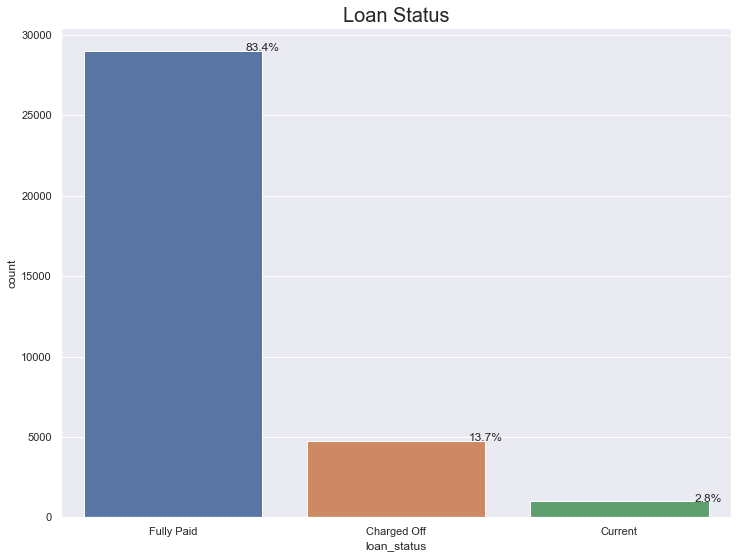

In [561]:

counts = loandata_up['loan_status'].value_counts().rename_axis('loan_status').reset_index(name='count')
sns.set(rc={'figure.figsize':(12,9)})
plt.title('Loan Status', fontsize=20)
total = float(len(loandata_up))
ax = sns.barplot(x='loan_status', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.show()

### It shows that 14.3% of the Loan status is Charged off

In [562]:
def plotting(base):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    for ax, multiple in zip((ax1, ax2), ['layer', 'fill']):
        sns.histplot(data=loandata_up, x=base, hue='loan_status',hue_order= ['Fully Paid','Charged Off','Current'], binwidth=10, stat='percent', multiple=multiple, ax=ax)
        ax.set_title(f"multiple='{multiple}'")

    for bar_group, color in zip(ax.containers, ['black', 'white']):
        ax.bar_label(bar_group, label_type='center', color=color,
        labels=[f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.show()

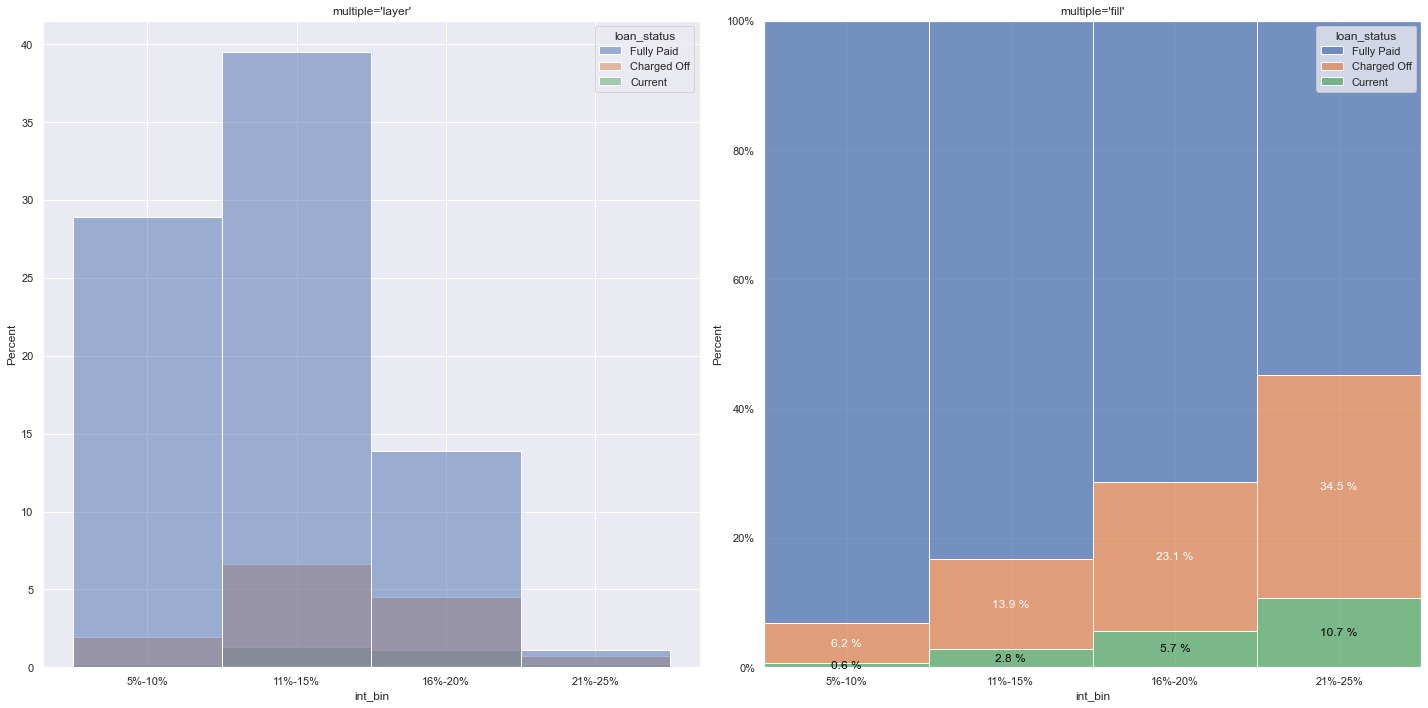

In [563]:
plotting('int_bin')


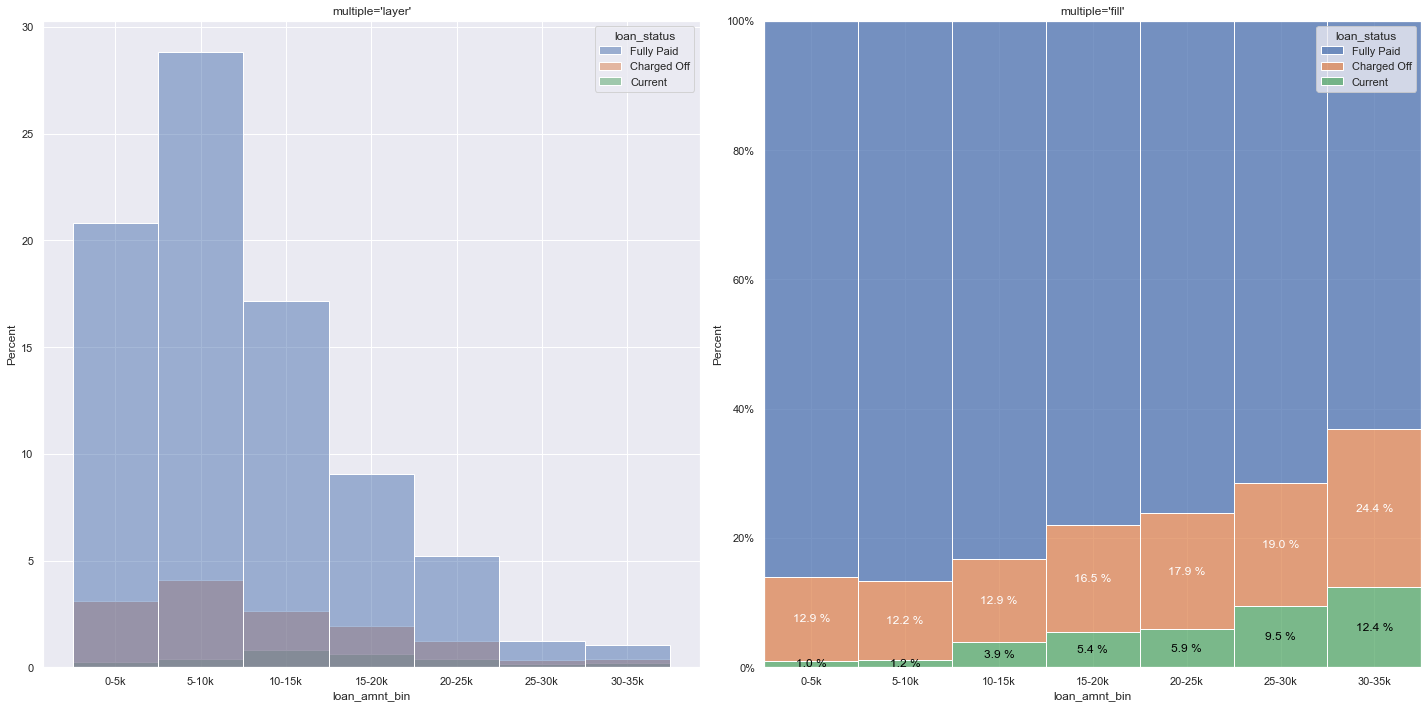

In [564]:
plotting('loan_amnt_bin')

In [565]:
#plotting('differenceinstallment')

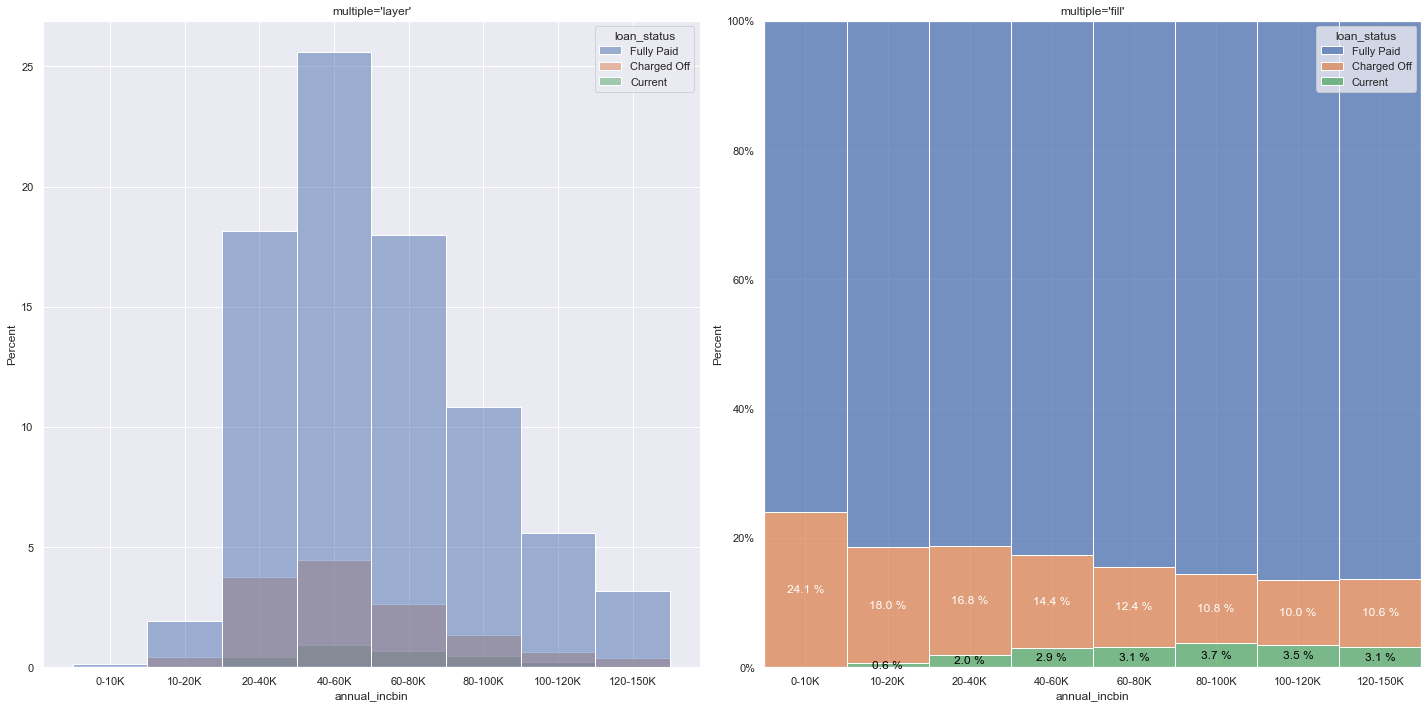

In [566]:
plotting('annual_incbin')

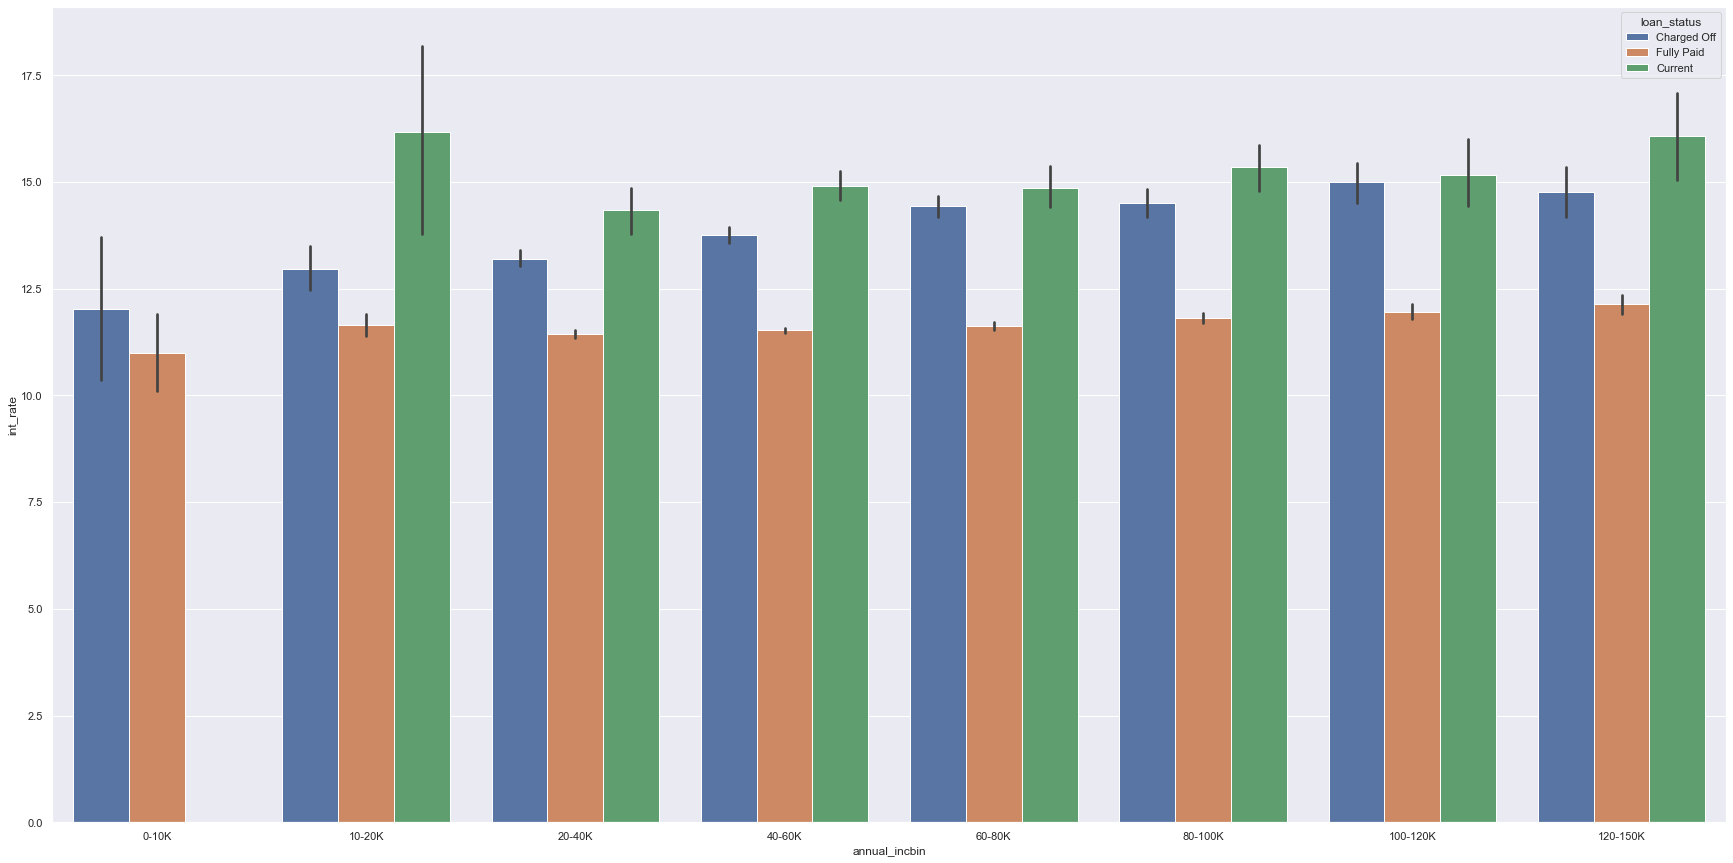

In [567]:
plt.figure(figsize=(30, 15))
sns.barplot(x='annual_incbin', y='int_rate',hue='loan_status', data=loandata_up)


plt.show()

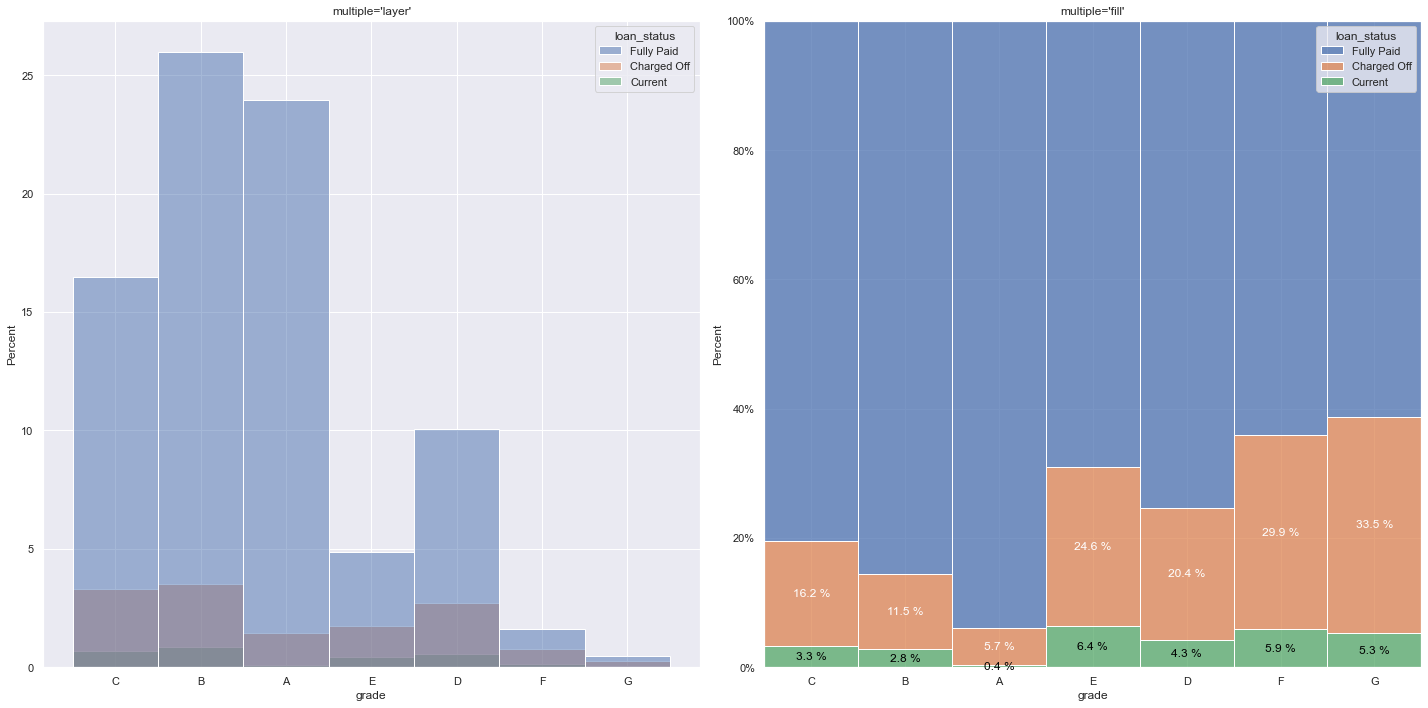

In [568]:
plotting('grade')

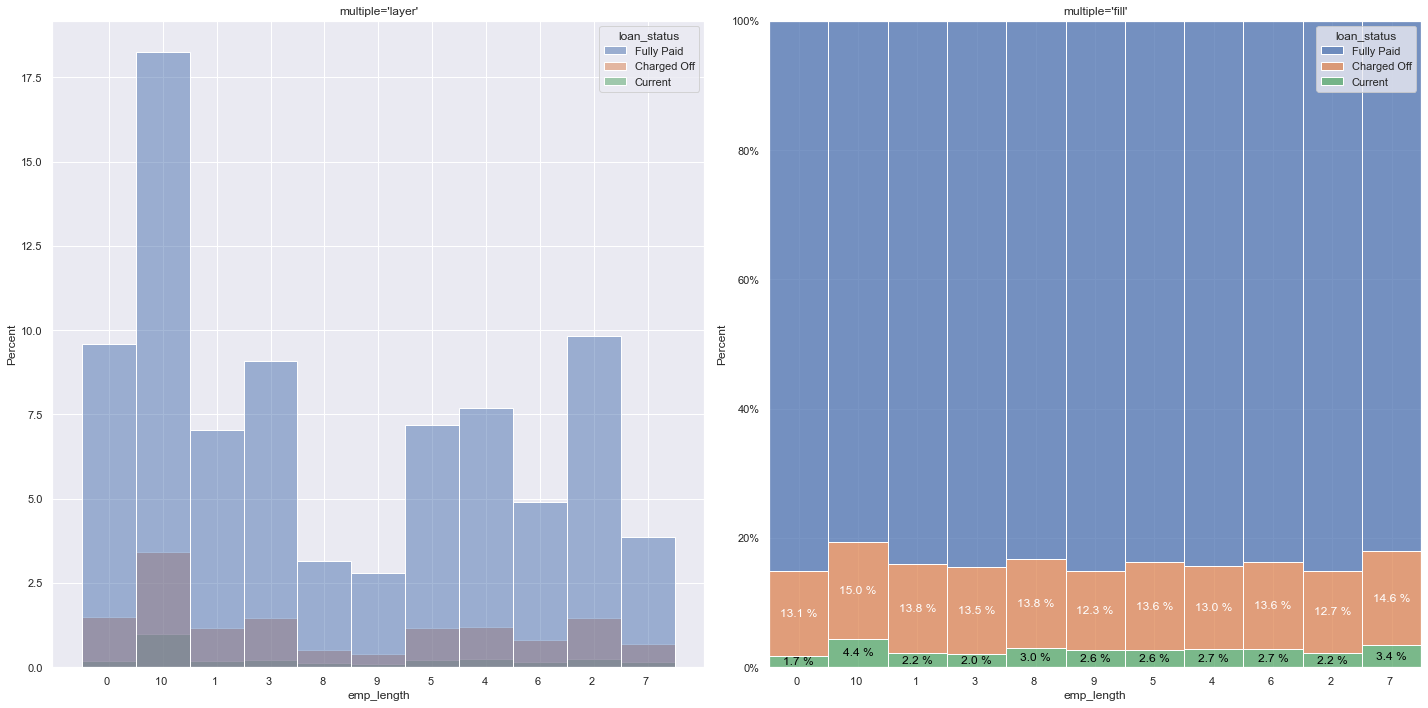

In [569]:
plotting('emp_length')


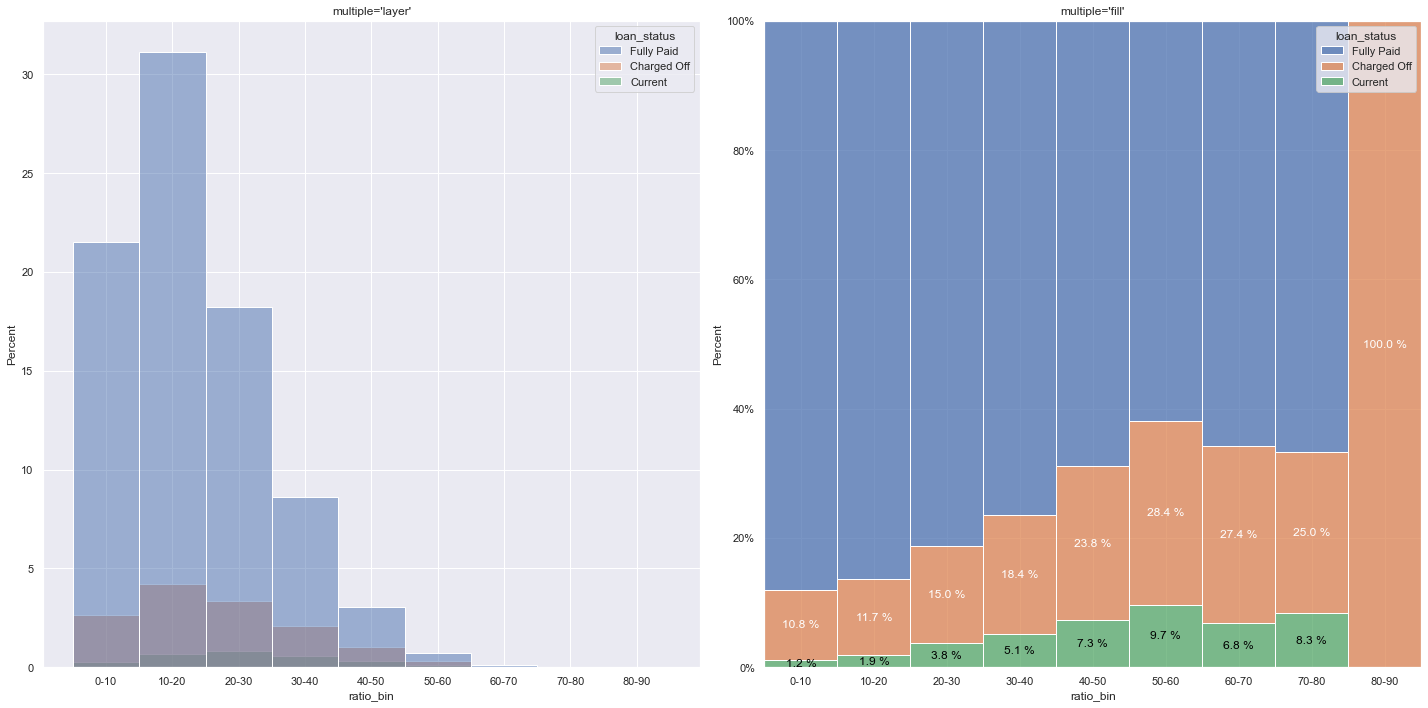

In [605]:
plotting('ratio_bin')


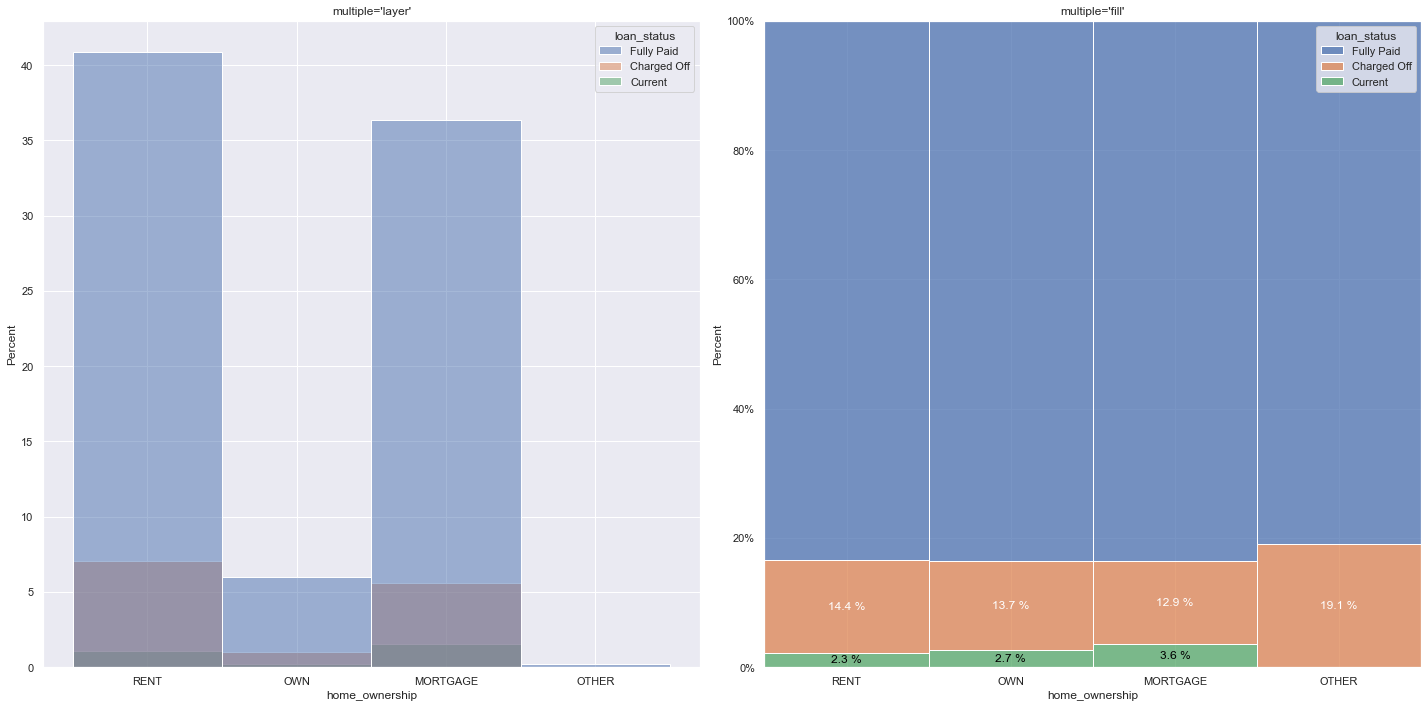

In [571]:
plotting('home_ownership')

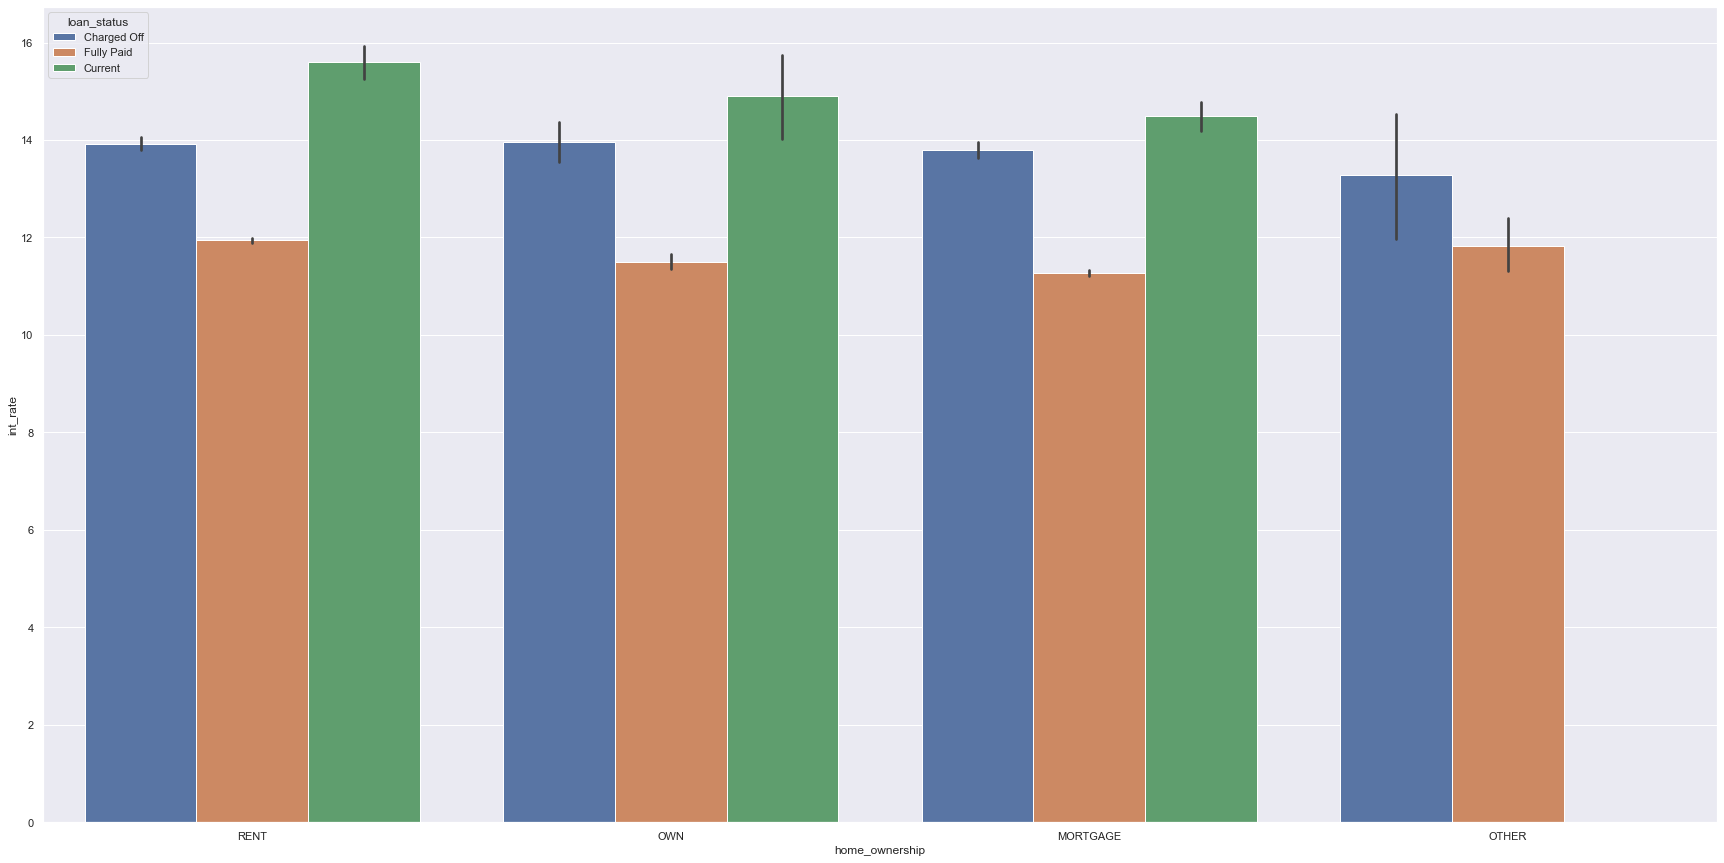

In [572]:
plt.figure(figsize=(30, 15))
sns.barplot(x='home_ownership', y='int_rate',hue='loan_status', data=loandata_up)


plt.show()

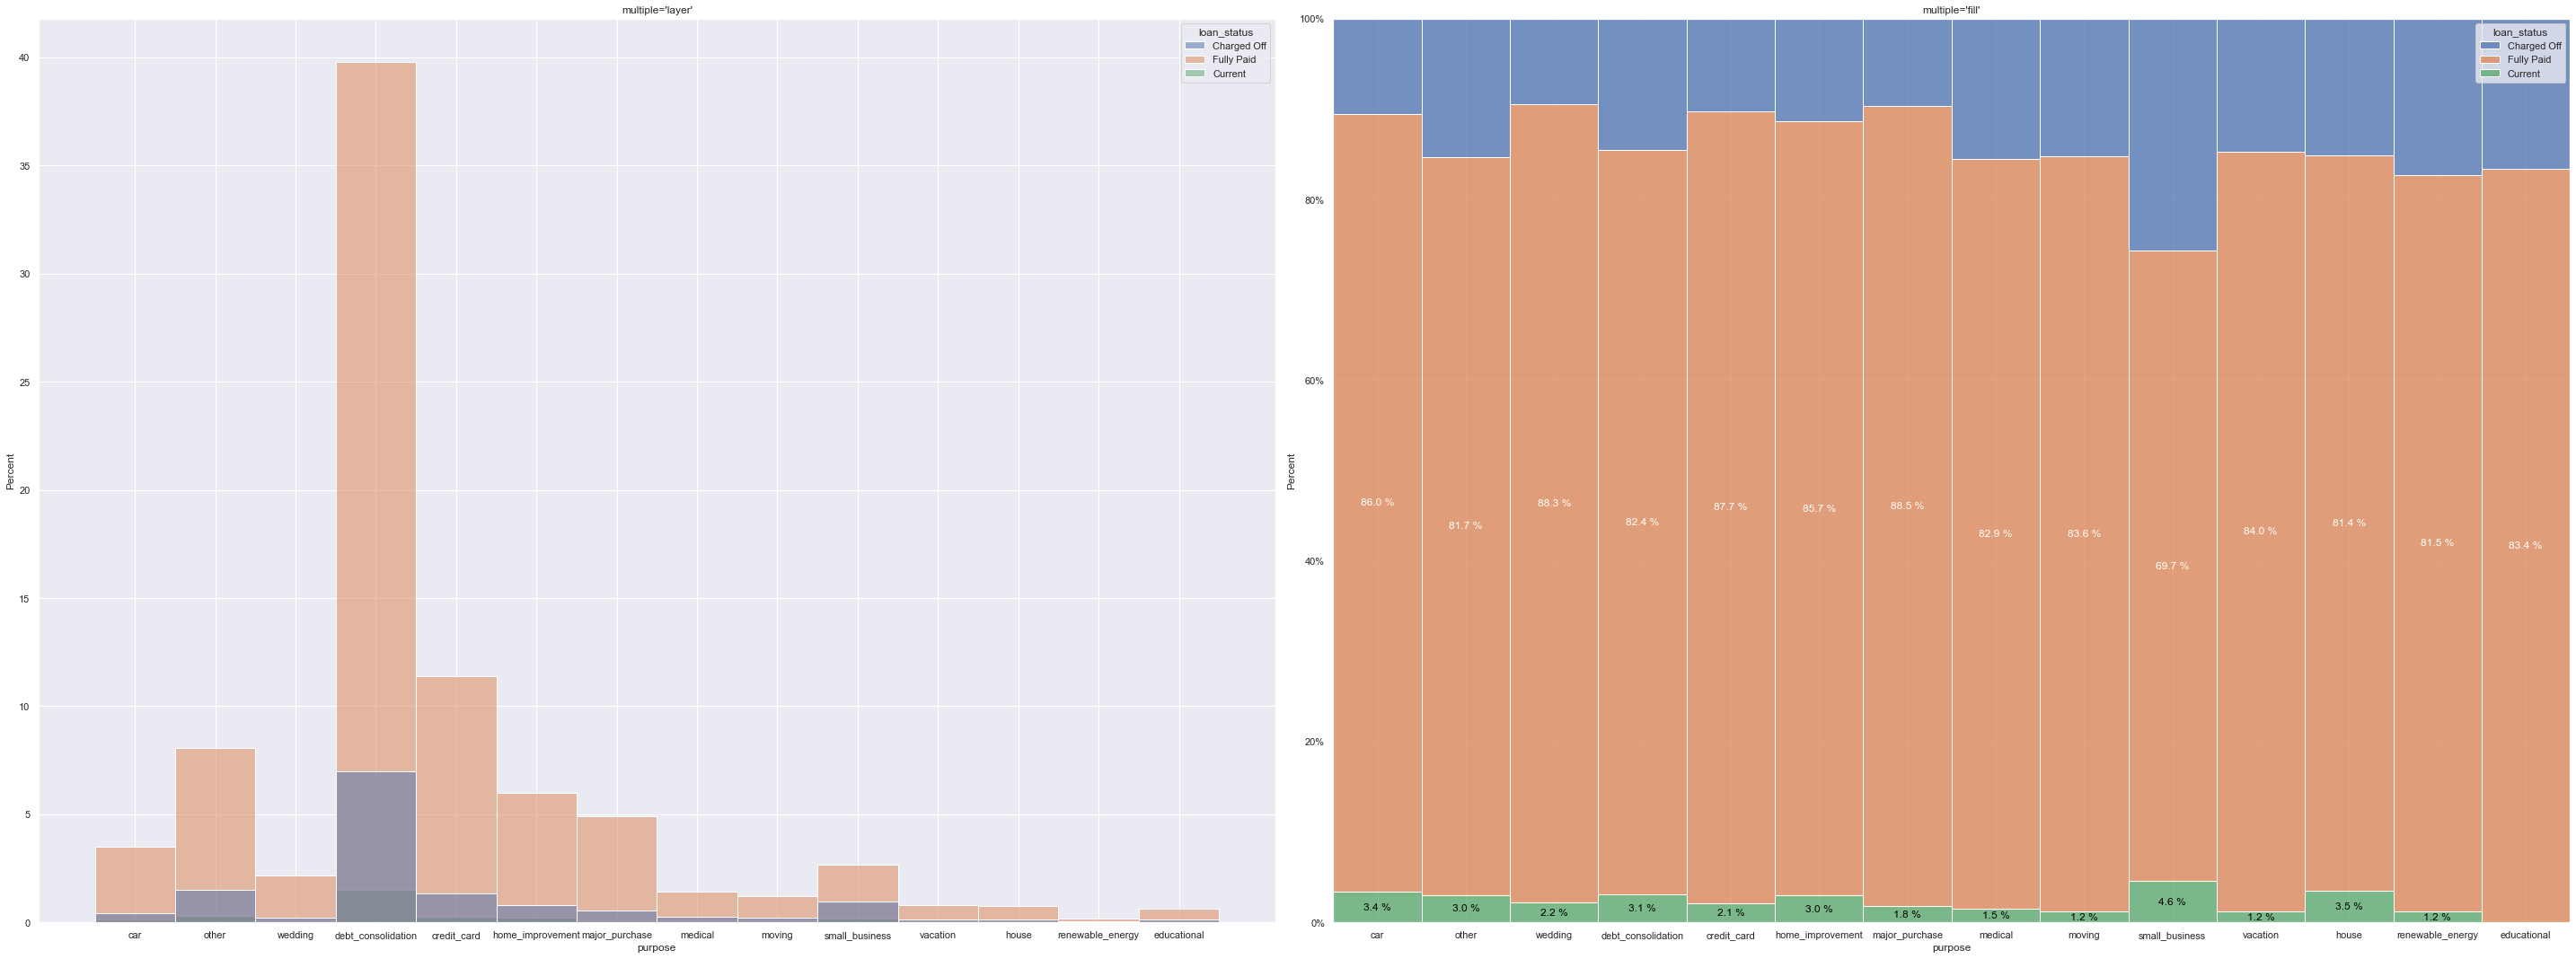

In [573]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(40, 15))
for ax, multiple in zip((ax1, ax2), ['layer', 'fill']):
    sns.histplot(data=loandata_up, x='purpose', hue='loan_status', binwidth=10, stat='percent', multiple=multiple, ax=ax)
    ax.set_title(f"multiple='{multiple}'")

for bar_group, color in zip(ax.containers, ['black', 'white']):
    ax.bar_label(bar_group, label_type='center', color=color,
                 labels=[f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

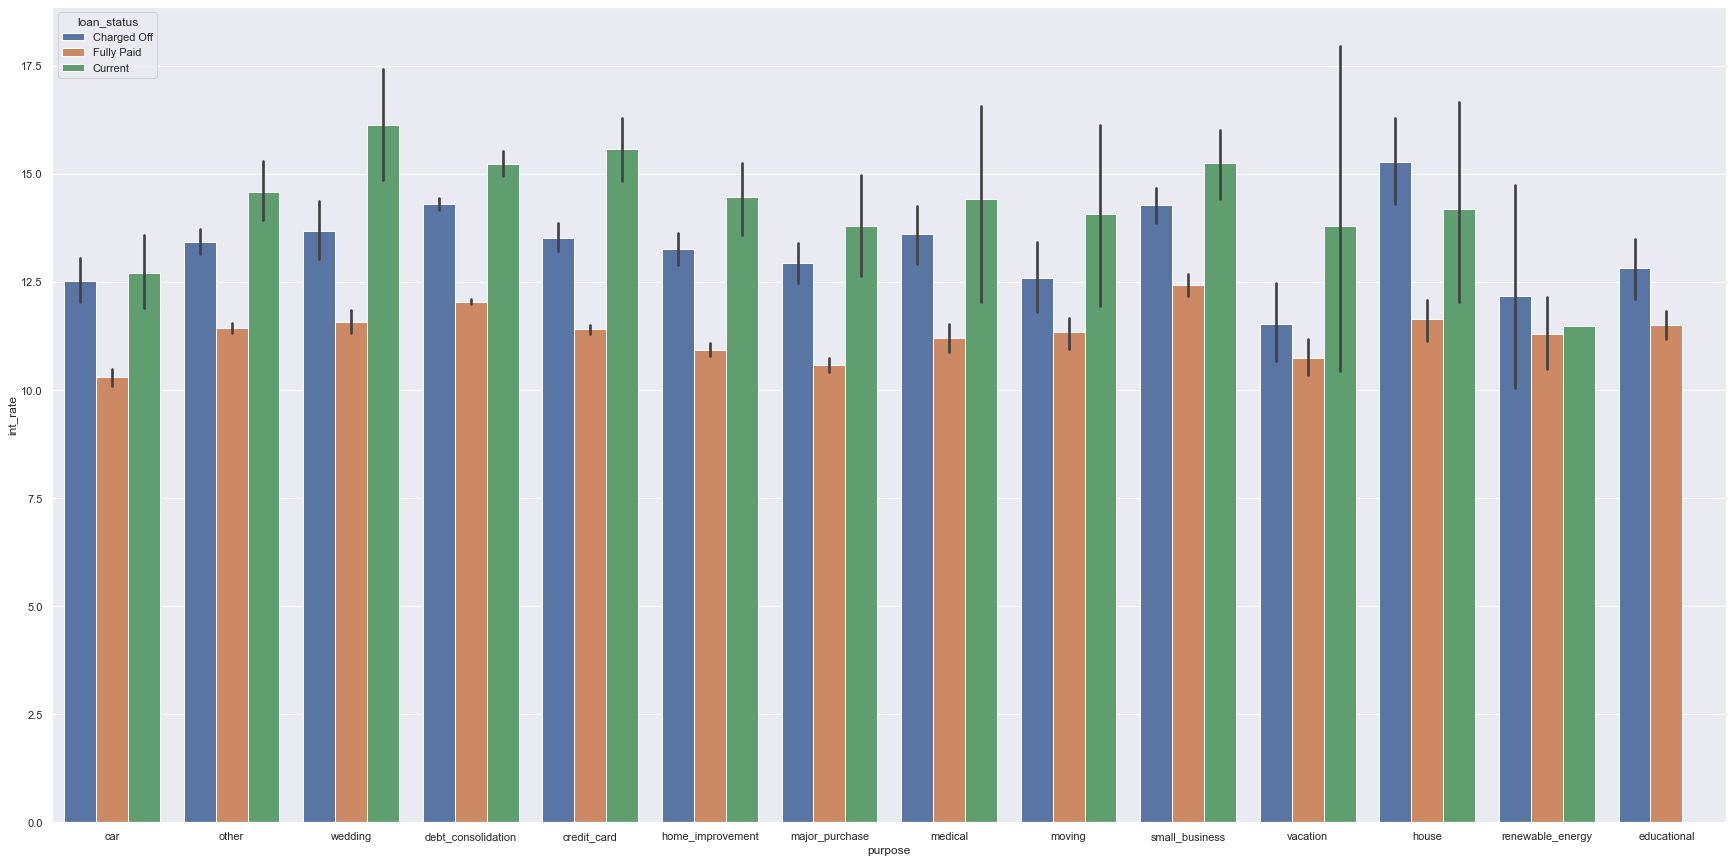

In [574]:

plt.figure(figsize=(30, 15))
sns.barplot(x='purpose', y='int_rate',hue='loan_status', data=loandata_up)


plt.show()

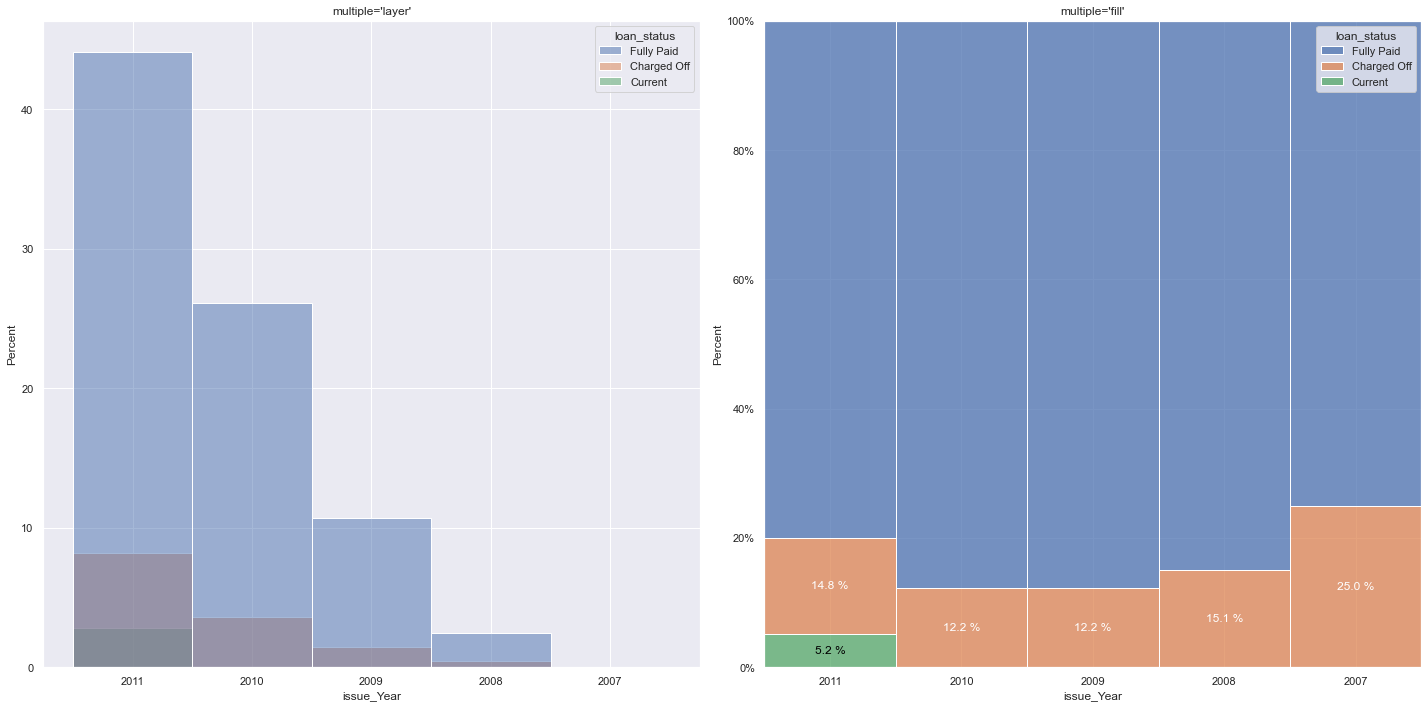

In [575]:
plotting('issue_Year')

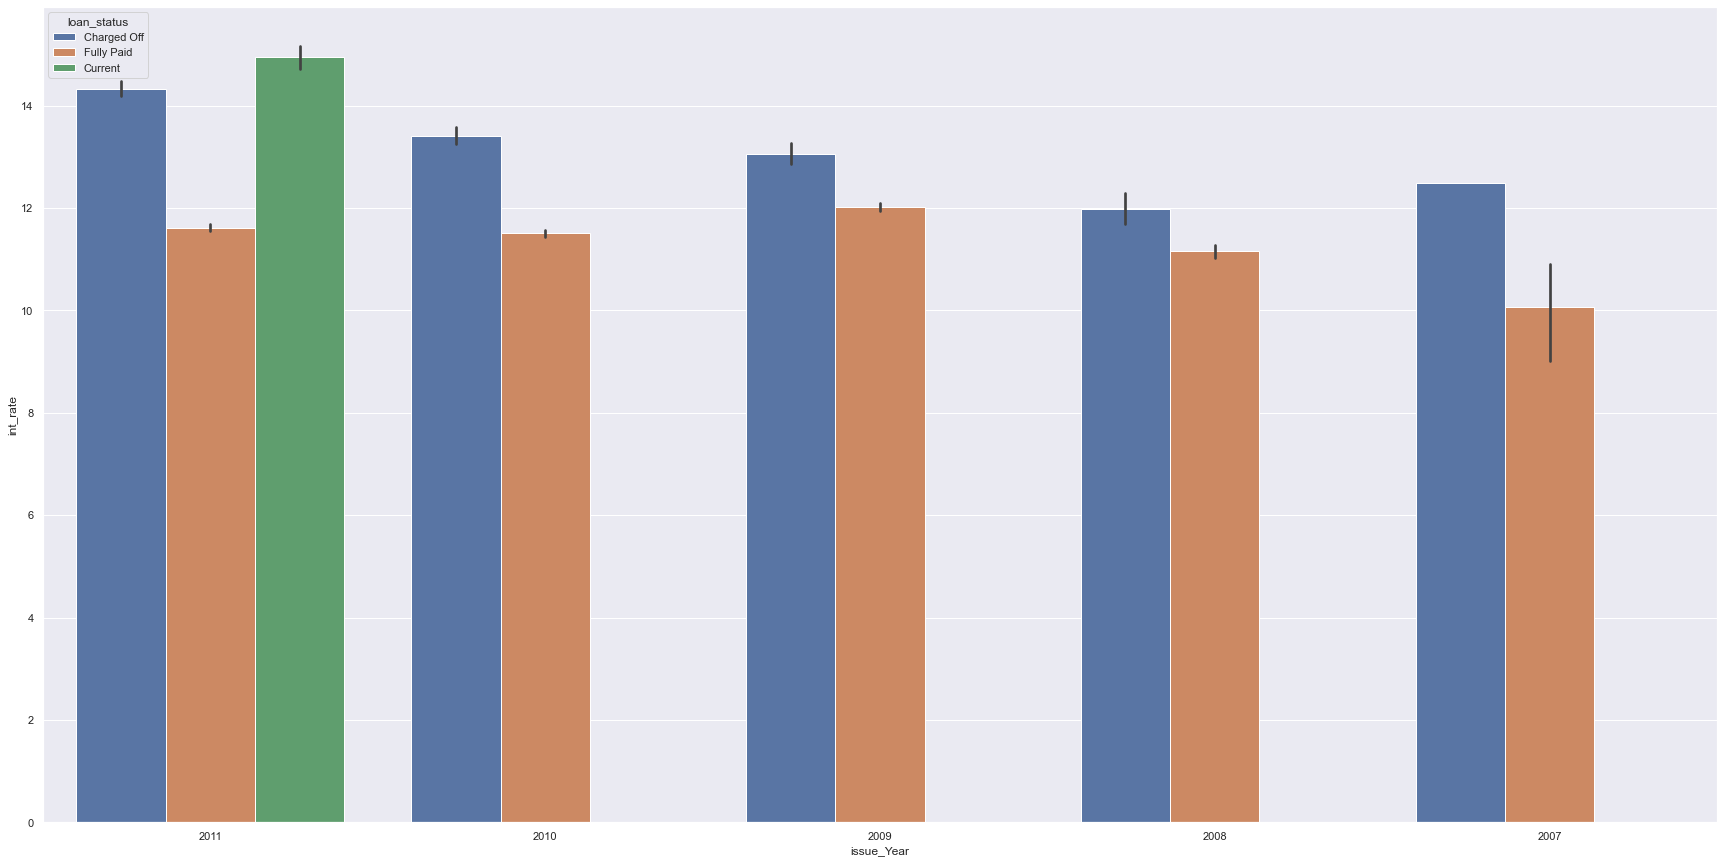

In [576]:
plt.figure(figsize=(30, 15))
sns.barplot(x='issue_Year', y='int_rate',hue='loan_status', data=loandata_up)


plt.show()

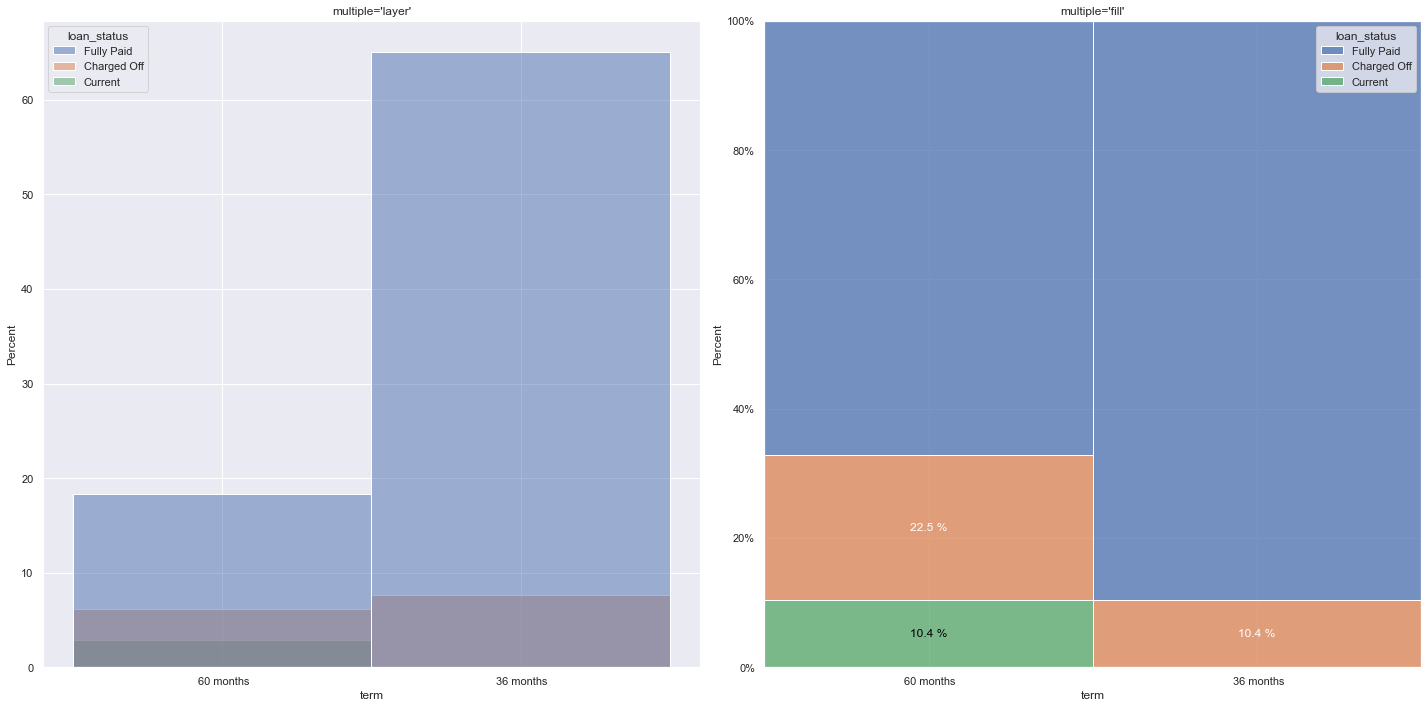

In [577]:
plotting('term')

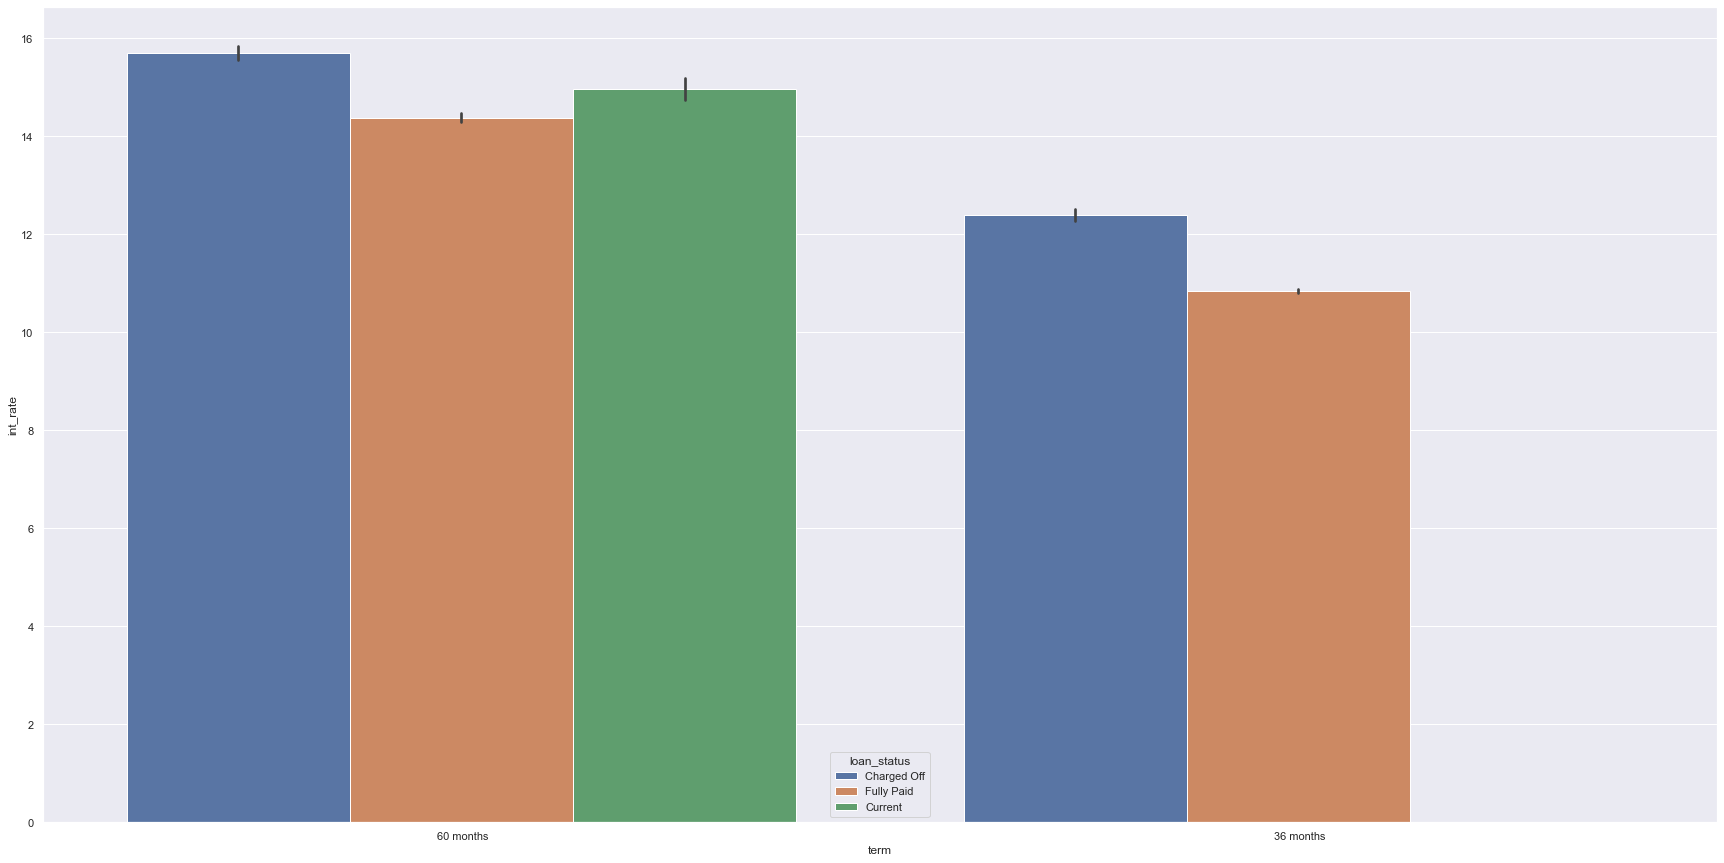

In [578]:
plt.figure(figsize=(30, 15))
sns.barplot(x='term', y='int_rate',hue='loan_status', data=loandata_up)


plt.show()

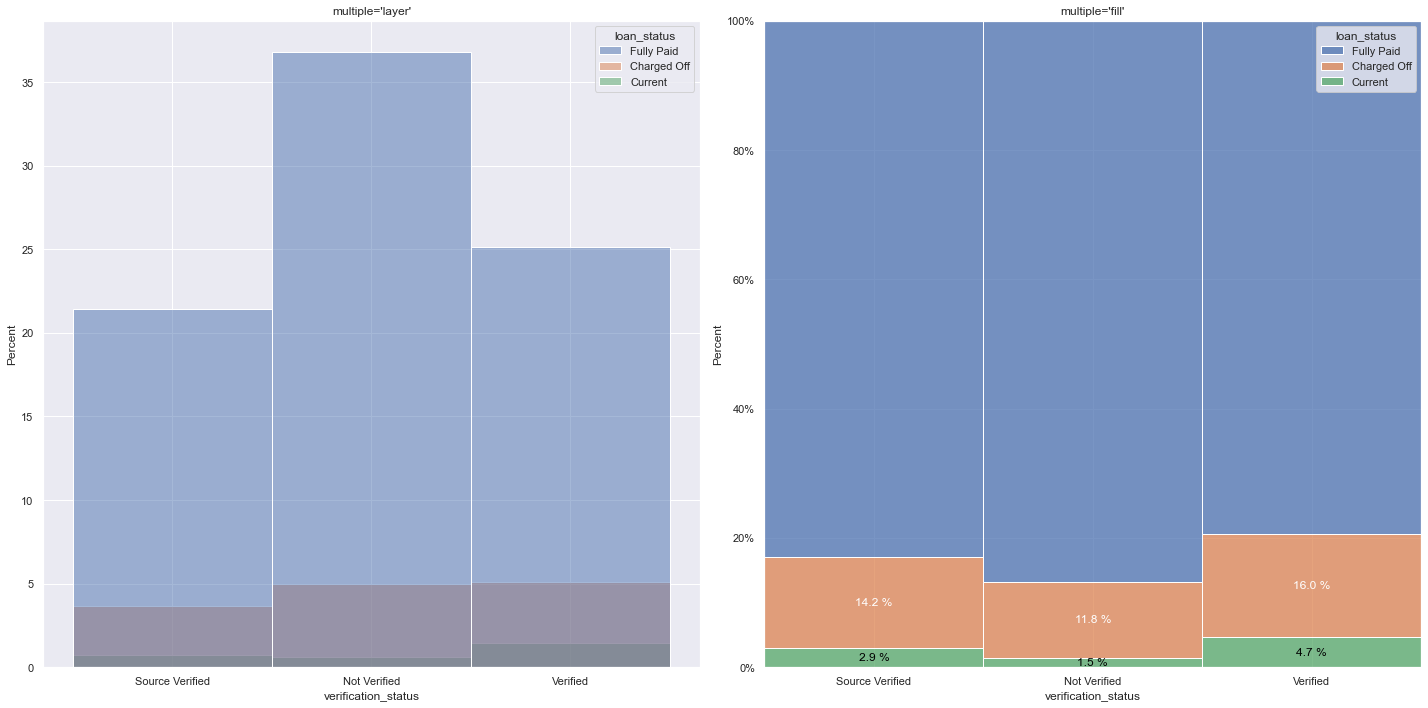

In [579]:
plotting('verification_status')

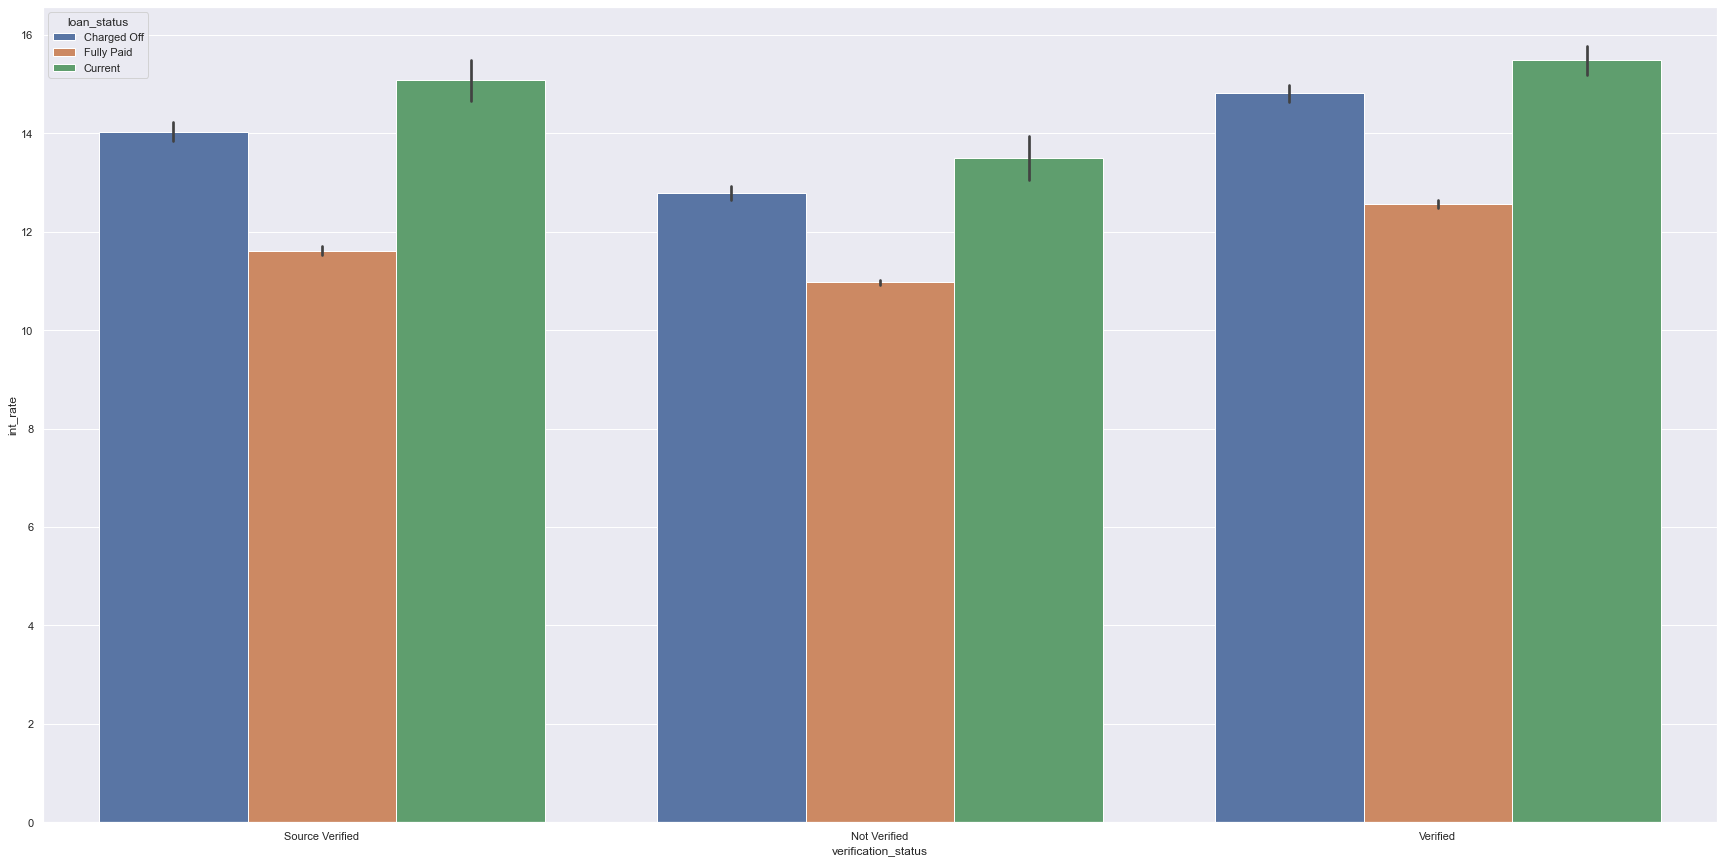

In [580]:
plt.figure(figsize=(30, 15))
sns.barplot(x='verification_status', y='int_rate',hue='loan_status', data=loandata_up)


plt.show()

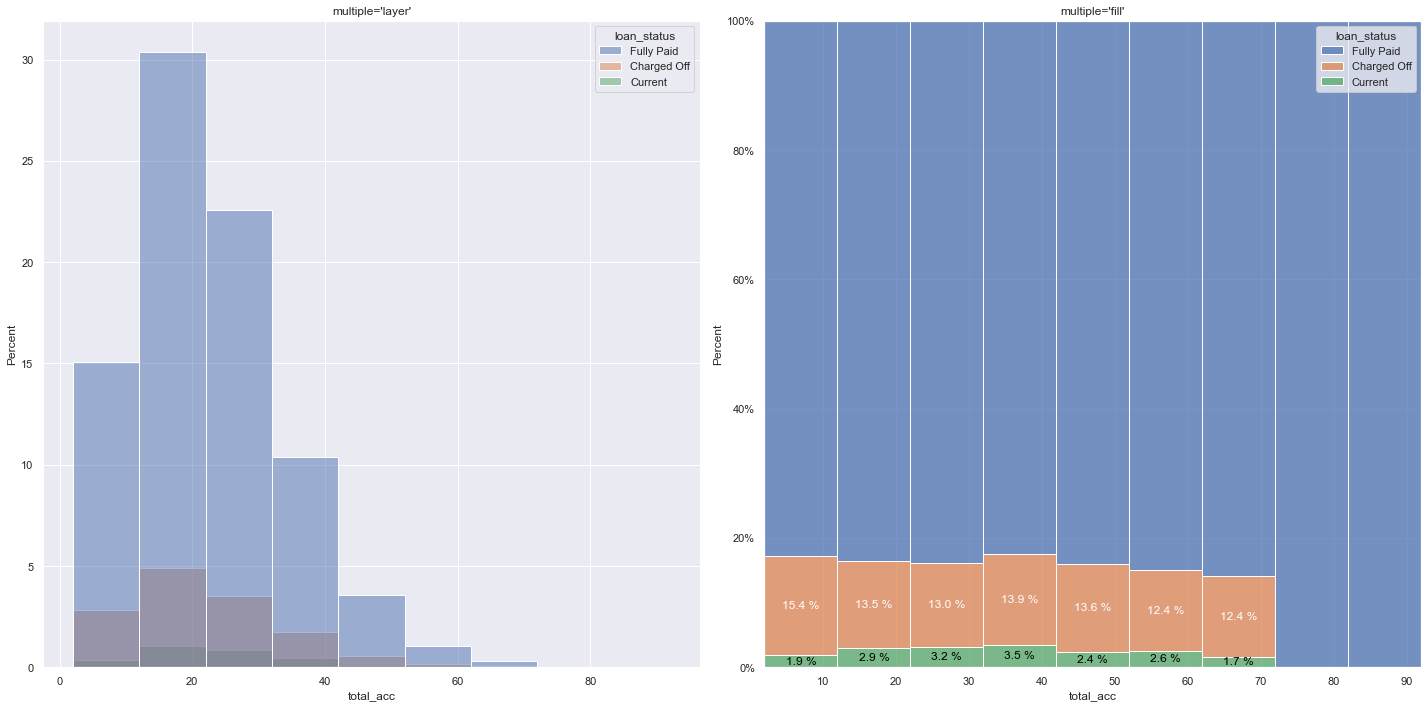

In [581]:
plotting('total_acc')

count     34738
unique     1079
top          0%
freq        800
Name: revol_util, dtype: object
count    34738.000000
mean        12.023682
std          3.708105
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64


<Figure size 1440x720 with 0 Axes>

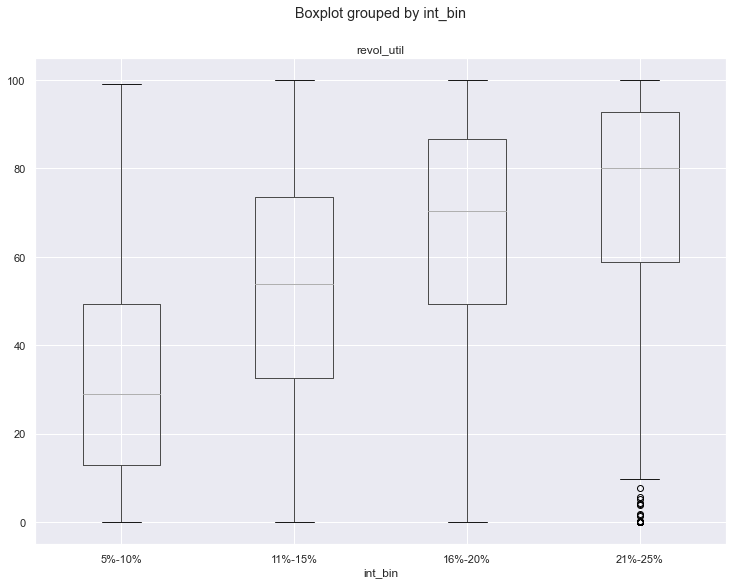

In [582]:
plt.figure(figsize=(20,10))
print(loandata_up['revol_util'].describe())
print(loandata_up.int_rate.describe())
loandata_up.revol_util = loandata_up.revol_util.str[:-1].astype('float64')
loandata_up.boxplot(column='revol_util', by='int_bin')
plt.show()

<Figure size 1440x720 with 0 Axes>

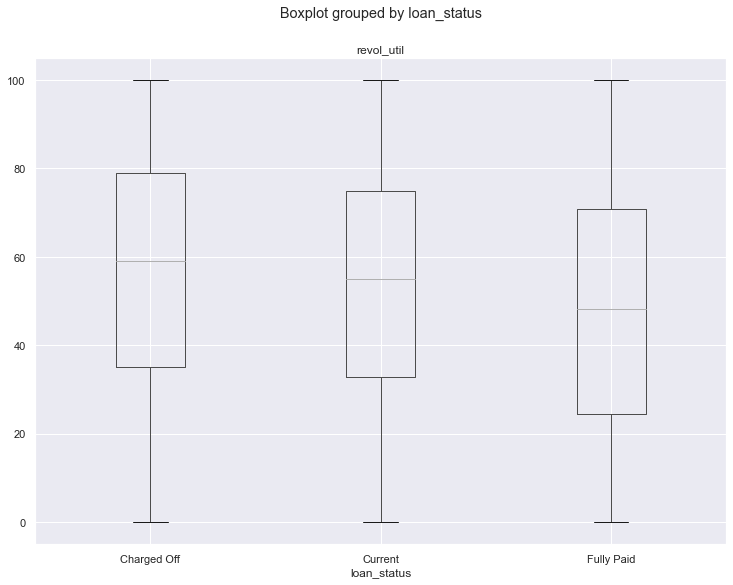

In [583]:
plt.figure(figsize=(20,10))

loandata_up.boxplot(column='revol_util', by='loan_status')
plt.show()

<Figure size 1440x720 with 0 Axes>

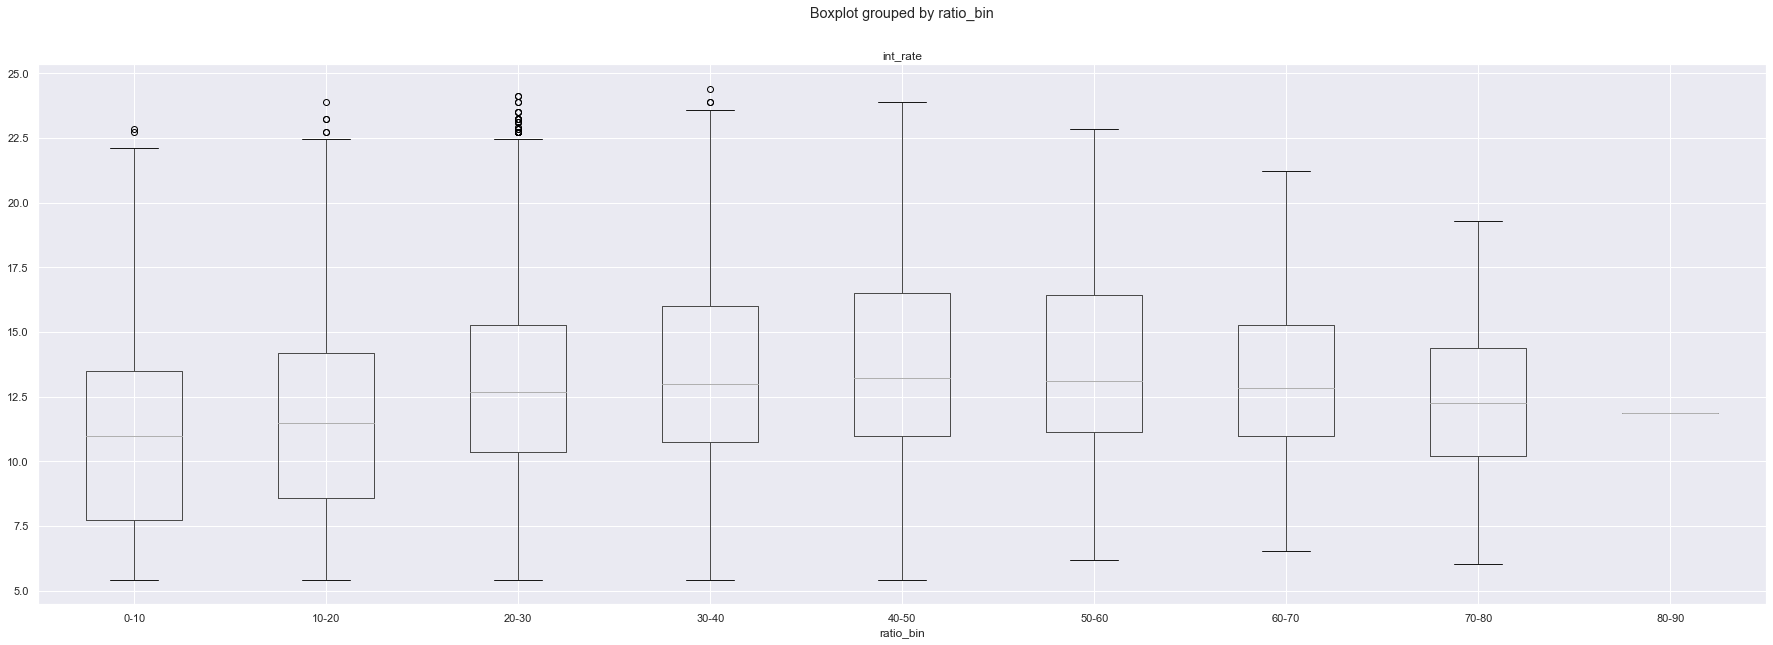

In [598]:
plt.figure(figsize=(20,10))

loandata_up.boxplot(column='int_rate', by='ratio_bin')
plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1440x720 with 0 Axes>

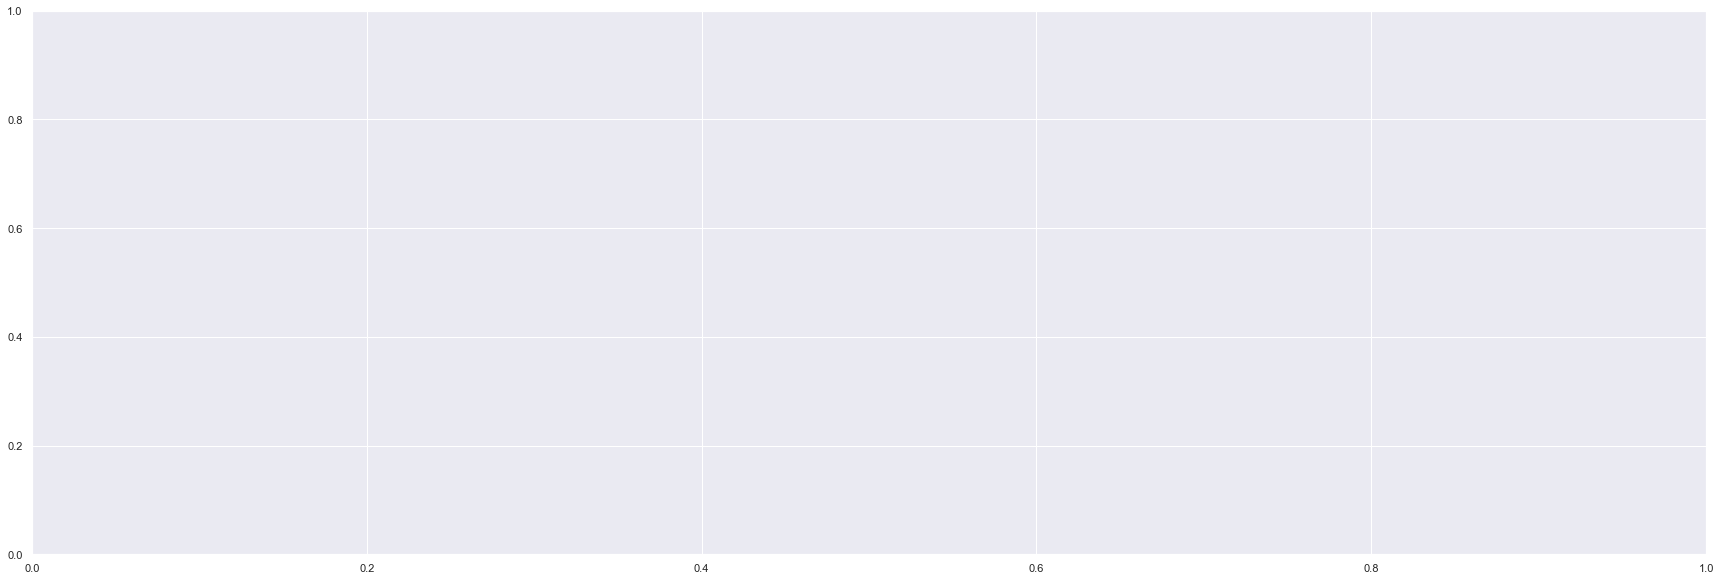

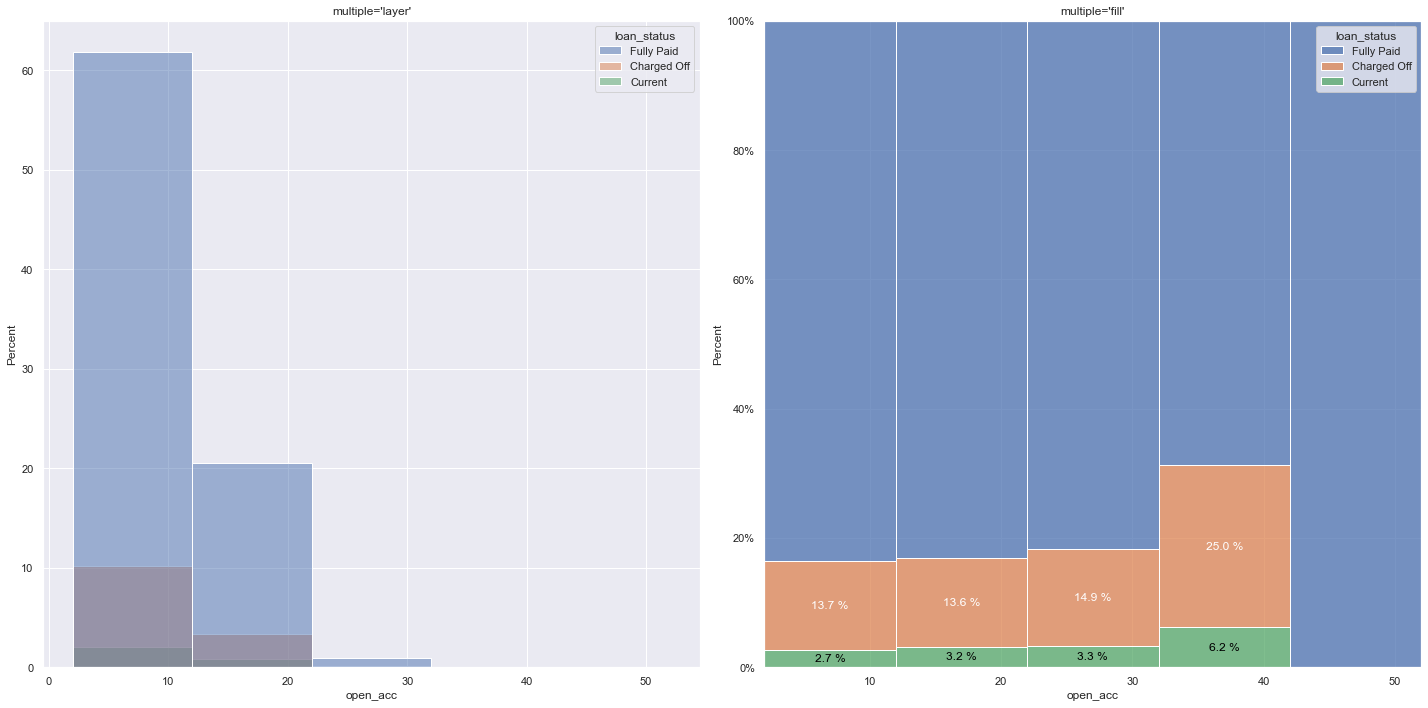

In [584]:
plotting('open_acc')

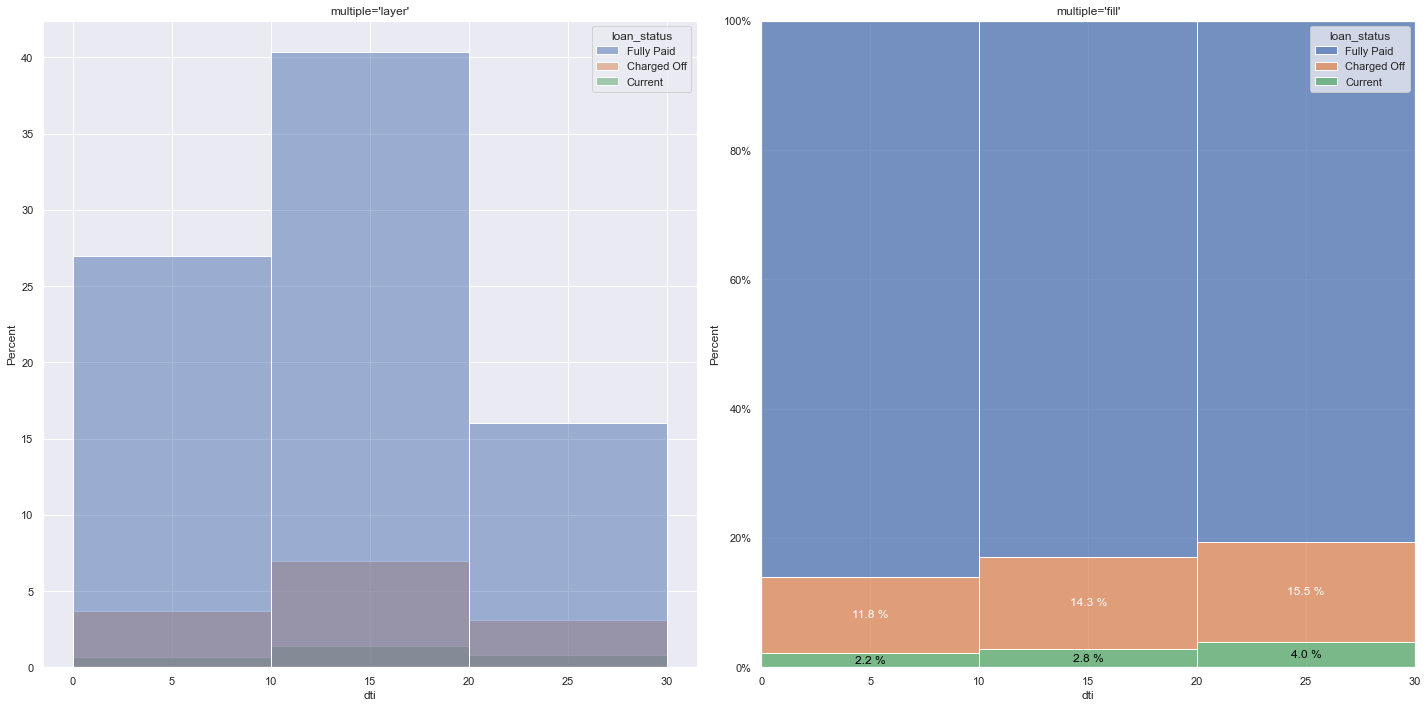

In [585]:
plotting('dti')

<Figure size 2160x1080 with 0 Axes>

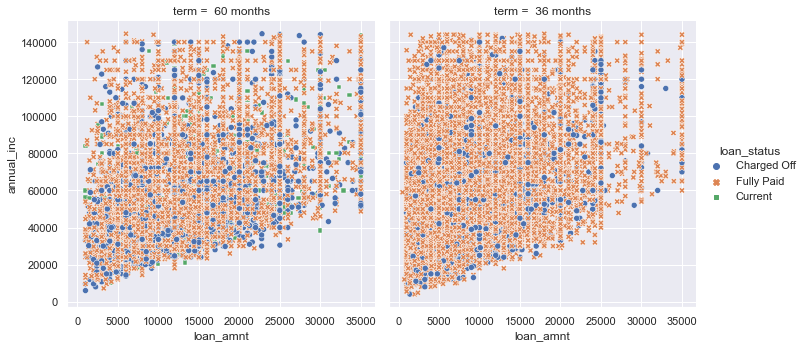

In [586]:
plt.figure(figsize=(30, 15))
sns.relplot(
    data=loandata_up, x="loan_amnt", y="annual_inc",
    col="term", hue="loan_status", style="loan_status",
    kind="scatter"
)


plt.show()



<Figure size 2160x1080 with 0 Axes>

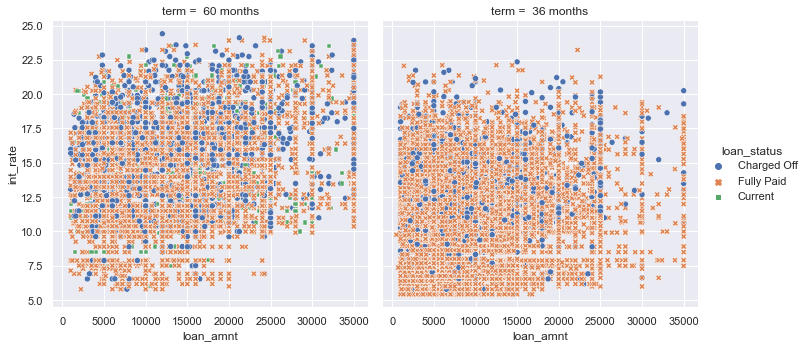

In [587]:
plt.figure(figsize=(30, 15))
sns.relplot(
    data=loandata_up, x="loan_amnt", y="int_rate",
    col="term", hue="loan_status", style="loan_status",
    kind="scatter"
)


plt.show()


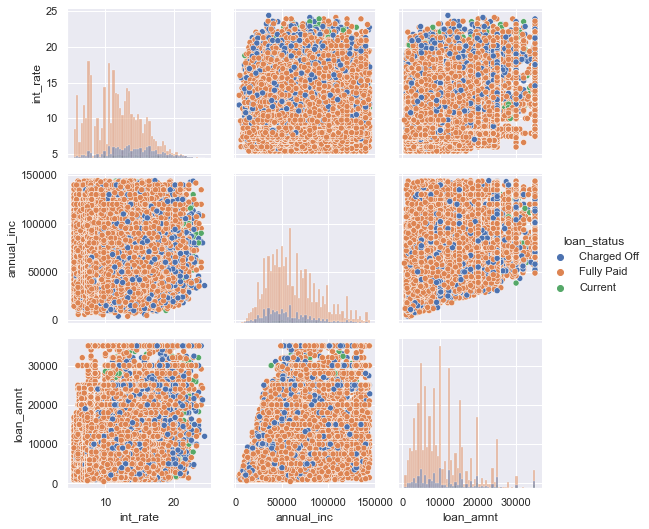

In [588]:
g = sns.PairGrid(loandata_up, vars=["int_rate", "annual_inc","loan_amnt"], hue="loan_status")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [589]:
loandata_up['Charged']= loandata_up["loan_status"].map(lambda x: "1" if "Charged Off" in x else "0")
loandata_up['Charged']= pd.to_numeric(loandata_up['Charged'])
loandata_up['Charged'].describe()

count    34738.000000
mean         0.137342
std          0.344213
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Charged, dtype: float64

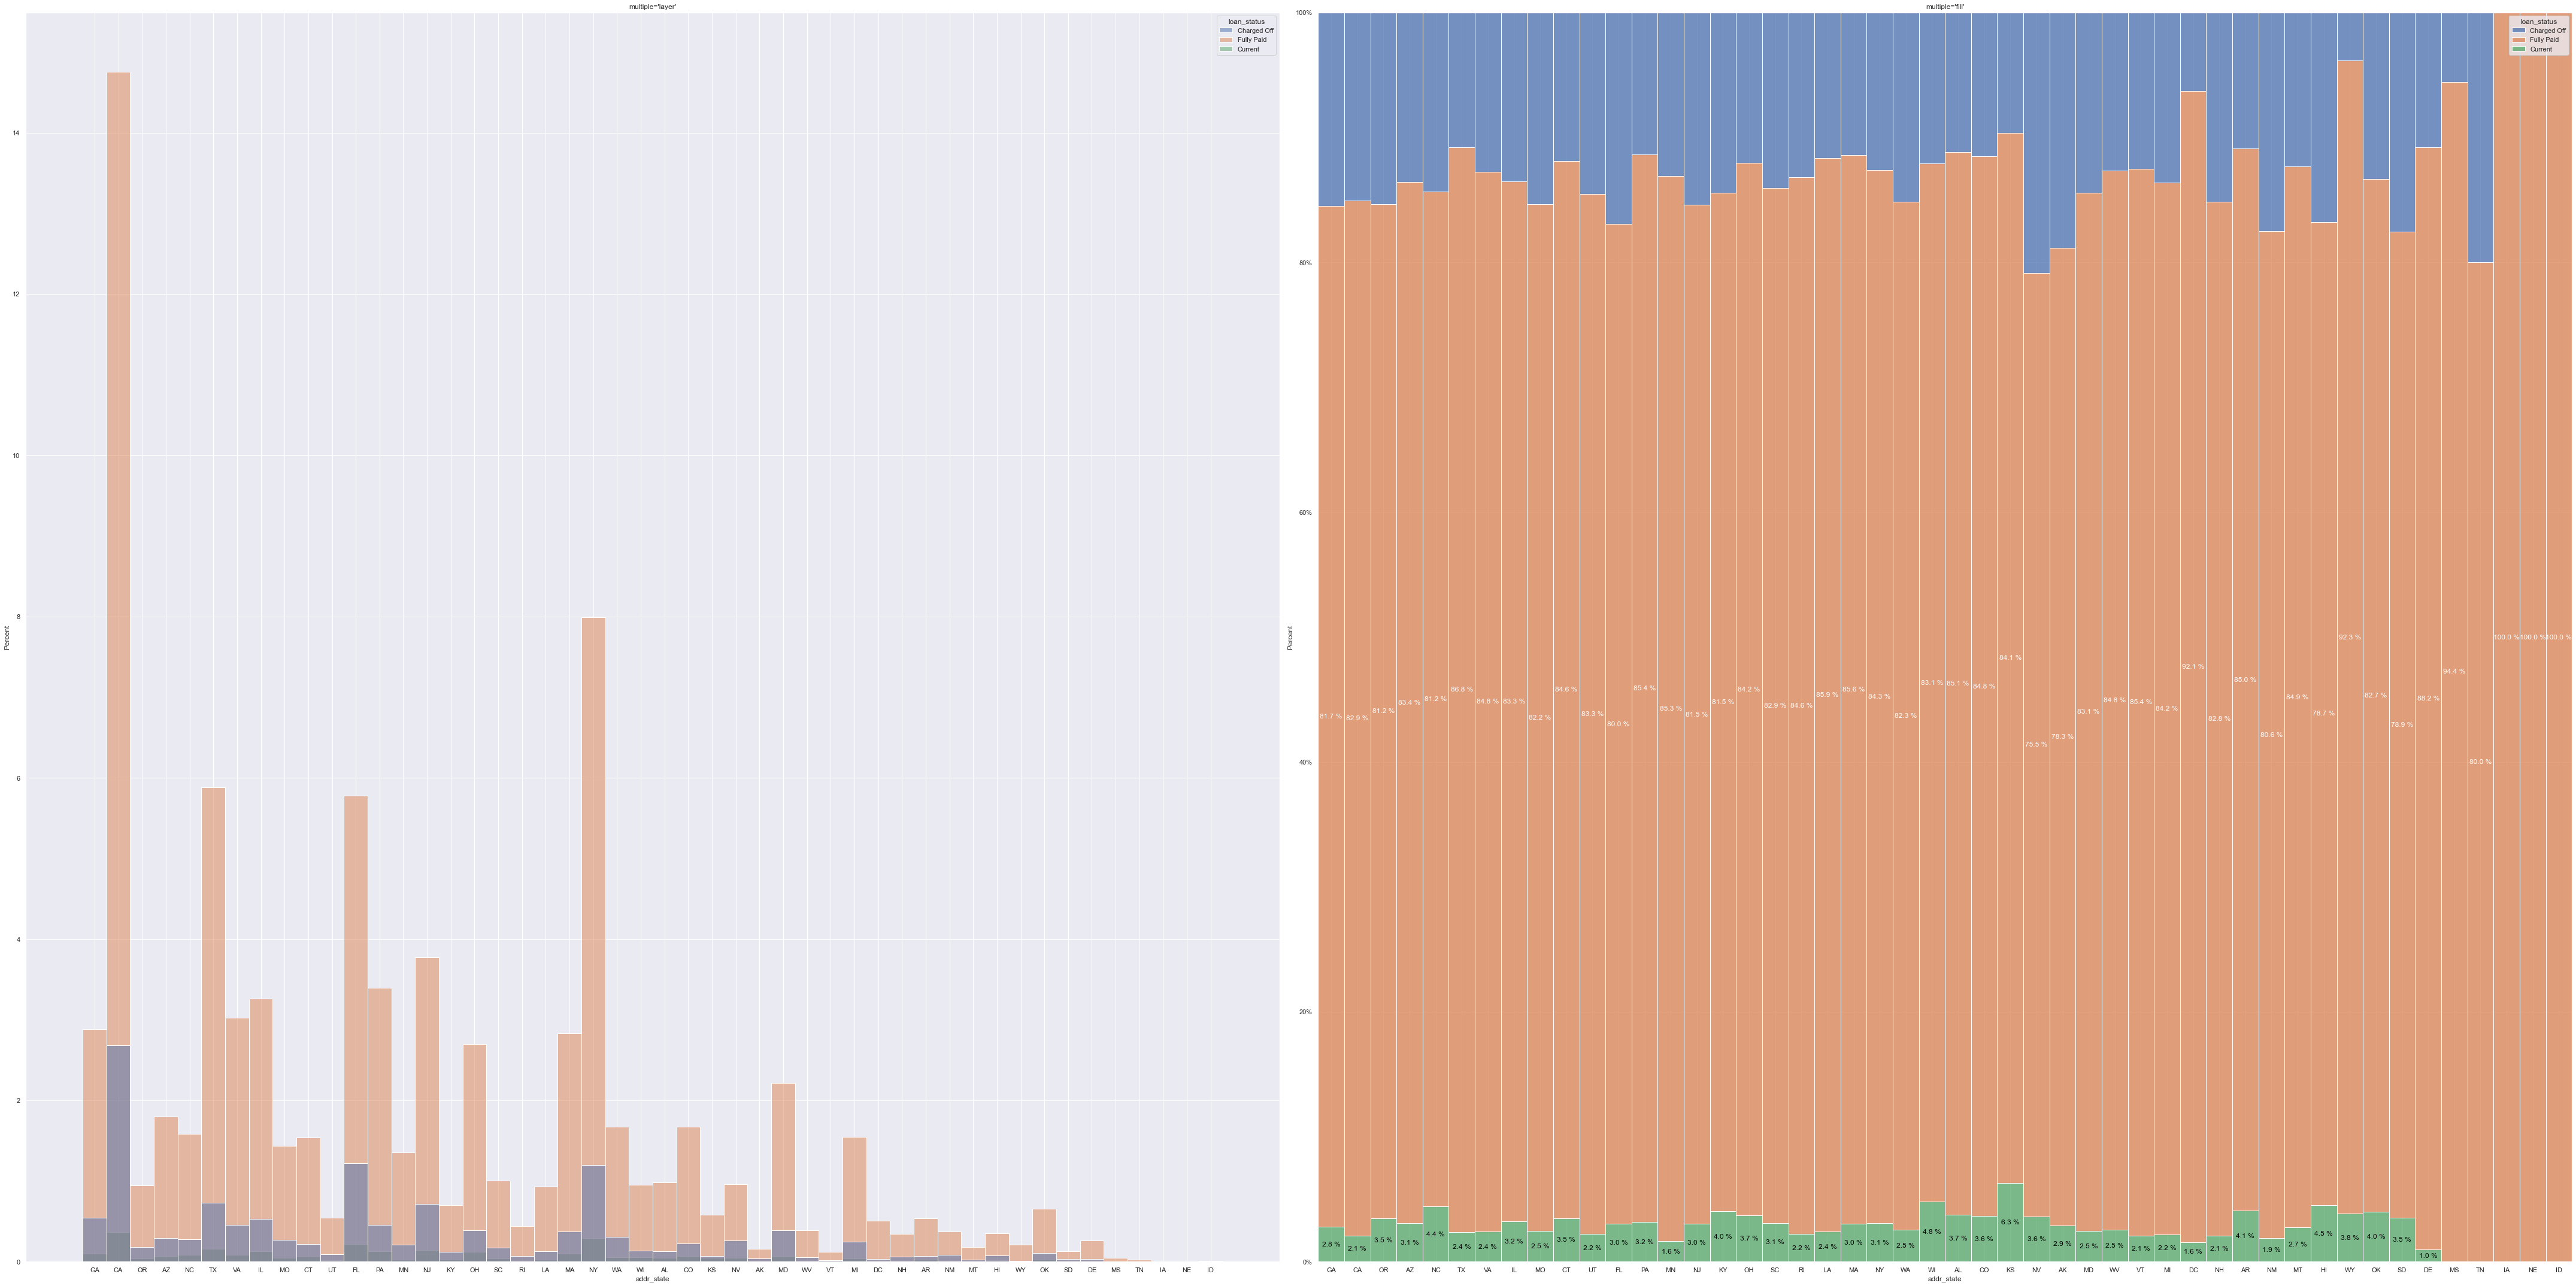

In [590]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(60, 30))
for ax, multiple in zip((ax1, ax2), ['layer', 'fill']):
    sns.histplot(data=loandata_up, x='addr_state', hue='loan_status', binwidth=10, stat='percent', multiple=multiple, ax=ax)
    ax.set_title(f"multiple='{multiple}'")

for bar_group, color in zip(ax.containers, ['black', 'white']):
    ax.bar_label(bar_group, label_type='center', color=color,
                 labels=[f'{bar.get_height() * 100:.1f} %' if bar.get_height() > 0 else '' for bar in bar_group])
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

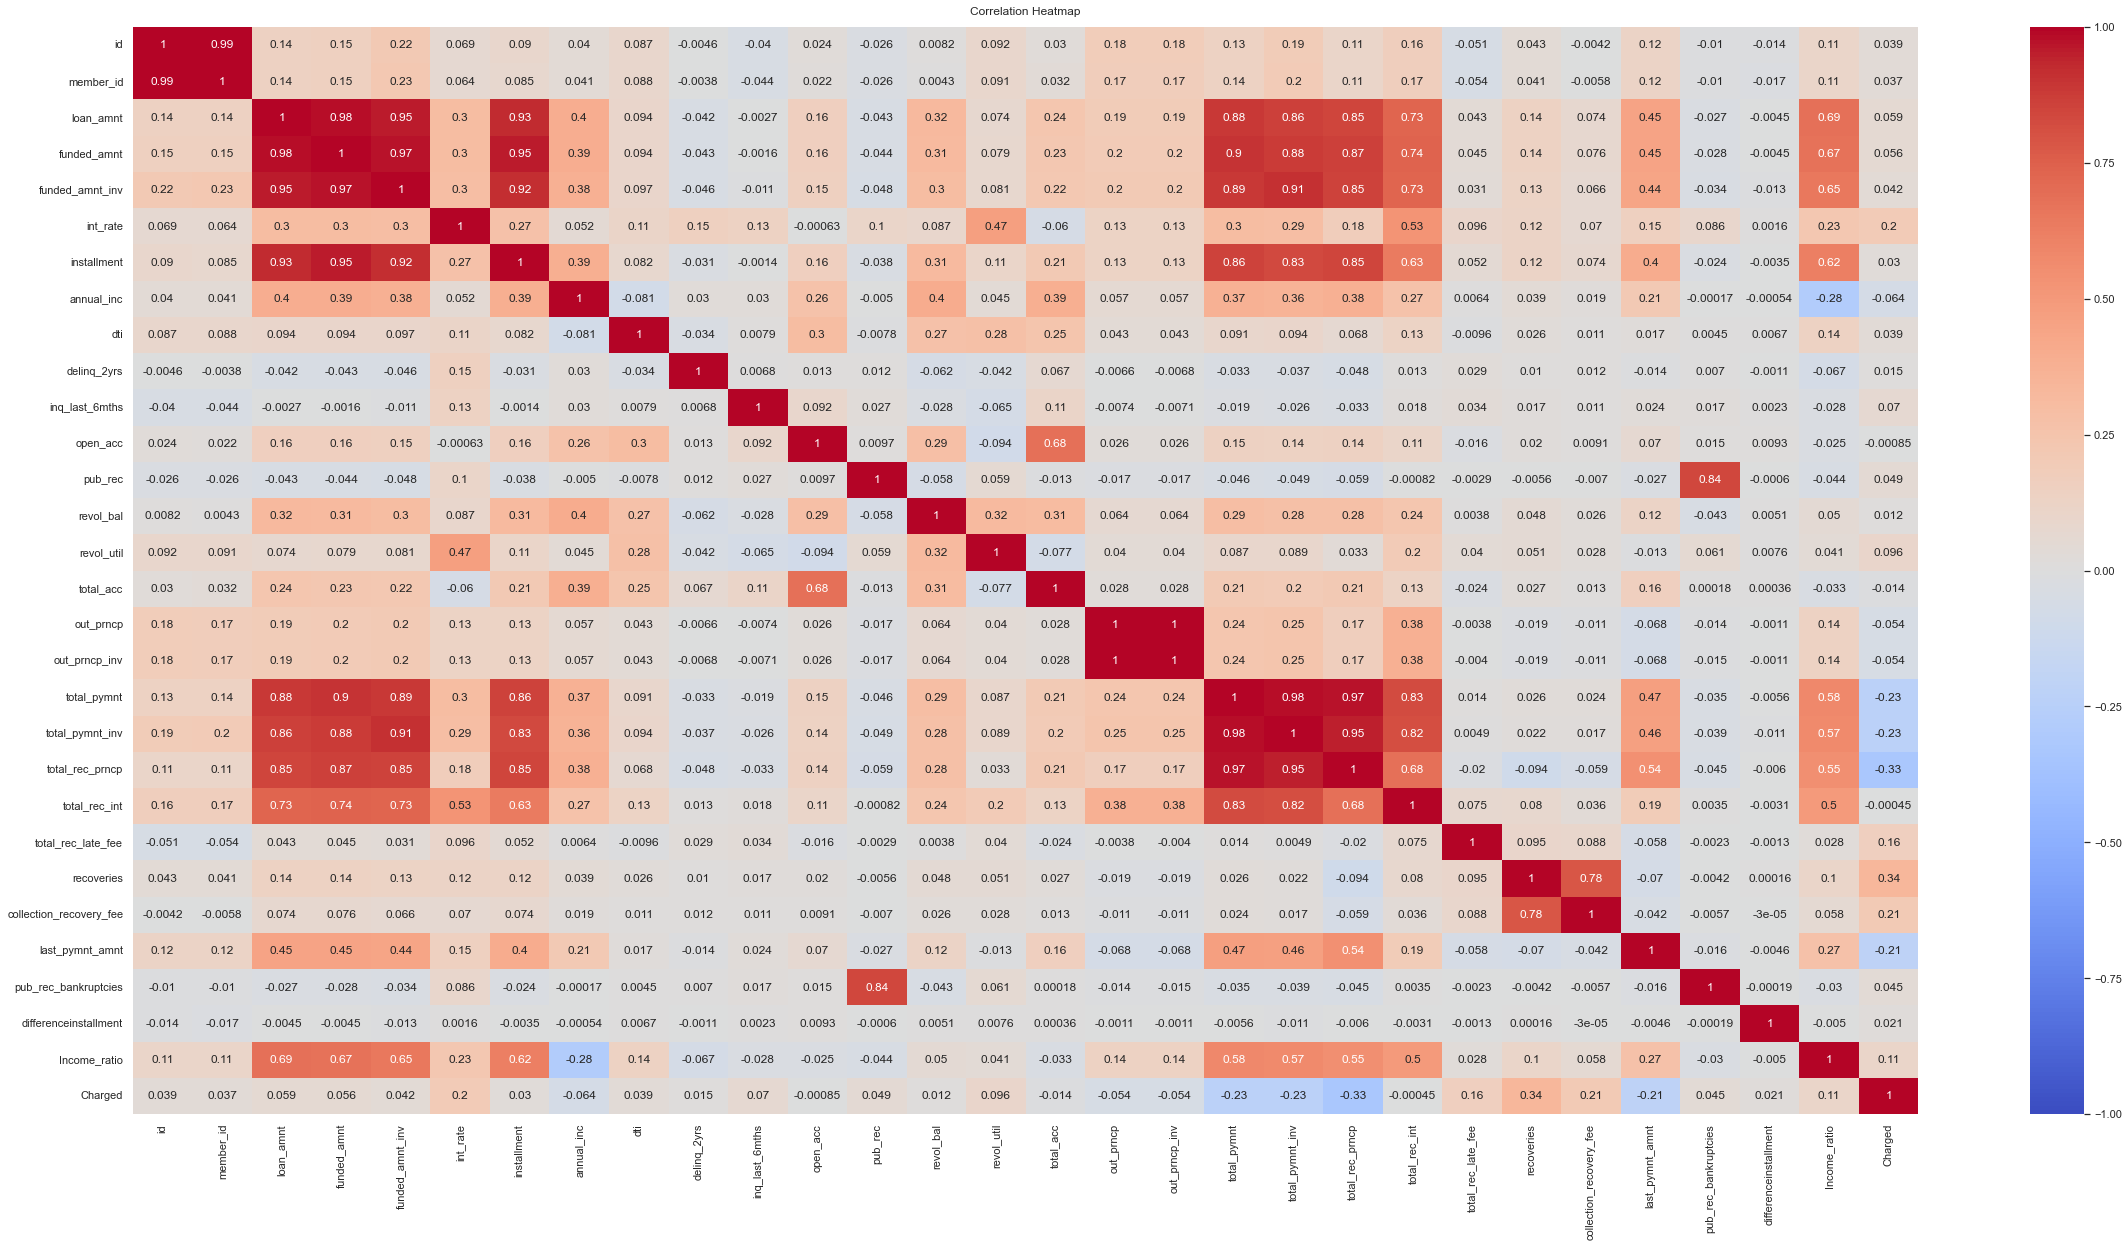

In [591]:
loandata_up = loandata_up.drop(['policy_code', 'acc_now_delinq','delinq_amnt'],axis = 1)
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(loandata_up.corr(), vmin=-1, vmax=1, annot=True,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
fig1 = heatmap.get_figure()
fig1.savefig('hist.png')

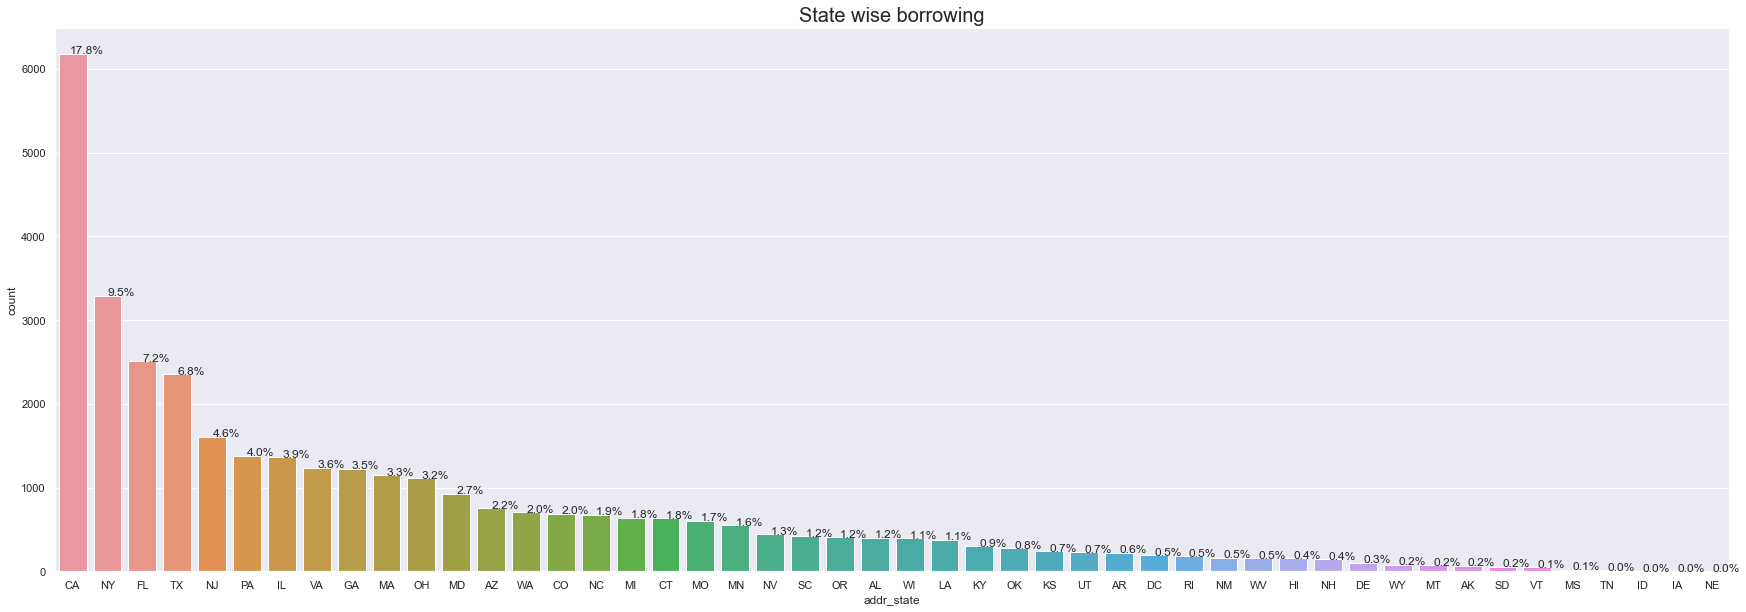

In [592]:
counts = loandata_up['addr_state'].value_counts().rename_axis('addr_state').reset_index(name='count')
sns.set(rc={'figure.figsize':(30,10)})
plt.title('State wise borrowing', fontsize=20)
total = float(len(loandata_up))
ax = sns.barplot(x='addr_state', y='count', data=counts)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.show()

In [593]:

counts1 = loandata_up.groupby(['addr_state'])['Charged'].sum()
counts1 = counts1.reset_index()
Combines = pd.merge(counts, counts1, on= 'addr_state' )
Combines['percentage'] = (Combines['Charged']/Combines['count'])*100
print(Combines)

   addr_state  count  Charged  percentage
0          CA   6184      932   15.071151
1          NY   3291      415   12.610149
2          FL   2508      425   16.945774
3          TX   2353      254   10.794730
4          NJ   1609      248   15.413300
5          PA   1380      157   11.376812
6          IL   1362      184   13.509545
7          VA   1239      158   12.752220
8          GA   1226      190   15.497553
9          MA   1149      131   11.401218
10         OH   1111      134   12.061206
11         MD    927      134   14.455232
12         AZ    751      102   13.581891
13         WA    707      107   15.134371
14         CO    686       79   11.516035
15         NC    677       97   14.327917
16         MI    638       87   13.636364
17         CT    631       75   11.885895
18         MO    606       93   15.346535
19         MN    550       72   13.090909
20         NV    441       92   20.861678
21         SC    420       59   14.047619
22         OR    404       62   15

In [594]:
import plotly.express as px

fig = px.choropleth(Combines,
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='percentage',
                    color_continuous_scale=[(0,'green'),(0.01,'blue'),(0.3,'yellow'),(0.65,'red'),(1,'purple')], 
                                        
                    
                    )
fig.show()


In [595]:
intrategraph= loandata_up.groupby(['addr_state'])['int_rate'].mean()
intrategraph = intrategraph.reset_index()
Combines1 = pd.merge(counts, intrategraph, on= 'addr_state' )


fig = px.choropleth(Combines1,
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='int_rate',
                    color_continuous_scale=[(0,'green'),(0.01,'blue'),(0.3,'yellow'),(0.65,'red'),(1,'purple')],
                                        
                    
                    )
fig.show()

  addr_state  count  Charged  percentage   int_rate
0         CA   6184      932   15.071151  12.102623
1         NY   3291      415   12.610149  12.089787
2         FL   2508      425   16.945774  12.010391
3         TX   2353      254   10.794730  11.955346
4         NJ   1609      248   15.413300  12.188732


<AxesSubplot:xlabel='int_rate', ylabel='percentage'>

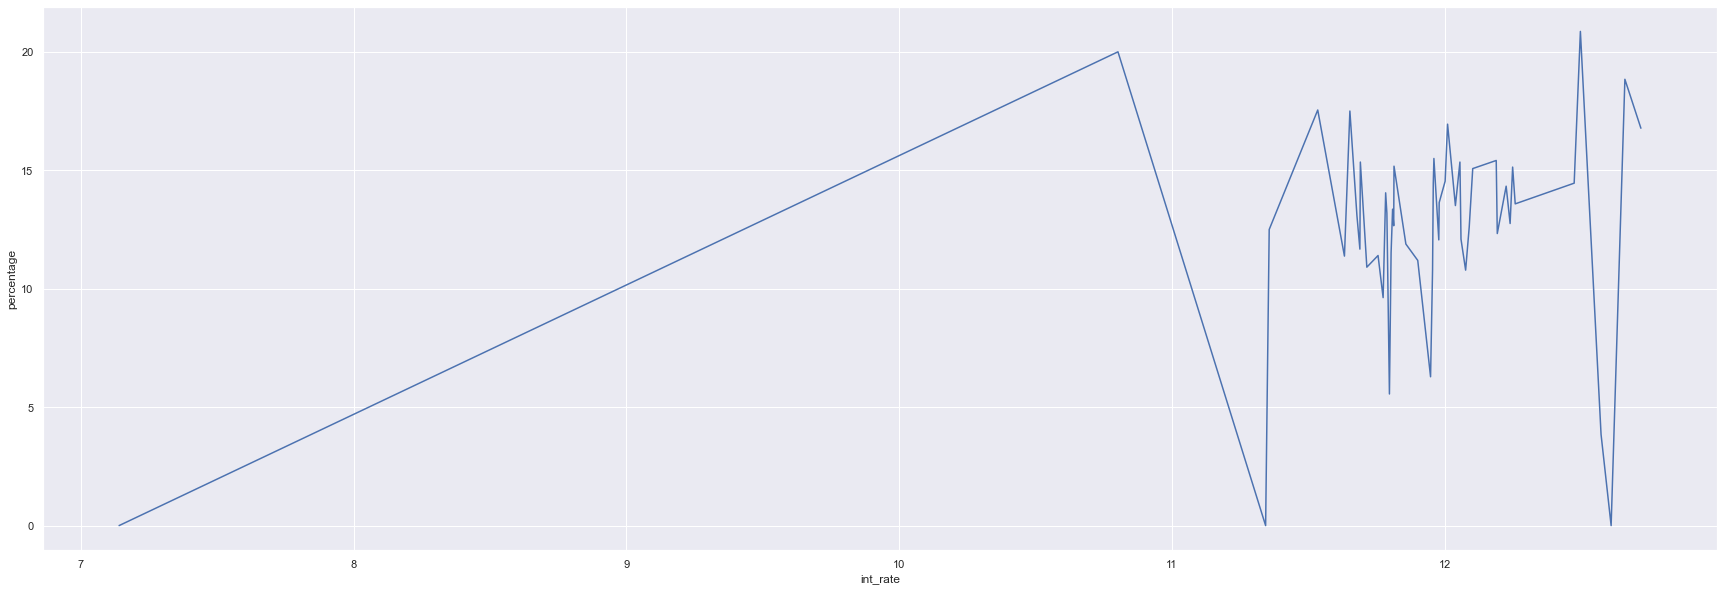

In [596]:
trend = pd.merge(Combines, intrategraph, on= 'addr_state' )
print(trend.head(5))
sns.lineplot(data=trend, x="int_rate", y="percentage")